In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import xgboost
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, RidgeCV, RidgeClassifier
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV

import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 평가 함수 정의
def get_clf_eval(y_actual, y_pred):
    accuracy = accuracy_score(y_actual, y_pred)
    precision = precision_score(y_actual, y_pred)
    recall = recall_score(y_actual, y_pred)
    AUC = roc_auc_score(y_actual, y_pred)
    F1 = f1_score(y_actual, y_pred)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('AUC: {:.4f}'.format(AUC))
    print('F1: {:.4f}'.format(F1))
    
    sns.heatmap(confusion_matrix(y_actual, y_pred), annot=True, fmt='d', cmap='YlGnBu')

## EDA

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/year-dream 실습/개인 캐글 대회/data/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/year-dream 실습/개인 캐글 대회/data/test.csv')
df_train.head()


,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,tax_liens,emp_length1,emp_length2,emp_length3,emp_length4,emp_length5,emp_length6,emp_length7,emp_length8,emp_length9,emp_length10,emp_length11,emp_length12,home_ownership1,home_ownership2,home_ownership3,home_ownership4,home_ownership5,home_ownership6,verification_status1,verification_status2,verification_status3,purpose1,purpose2,purpose3,purpose4,purpose5,purpose6,purpose7,purpose8,purpose9,purpose10,purpose11,purpose12,purpose13,purpose14,initial_list_status1,initial_list_status2,mths_since_last_delinq1,mths_since_last_delinq2,mths_since_last_delinq3,mths_since_last_delinq4,mths_since_last_delinq5,mths_since_last_delinq6,mths_since_last_delinq7,mths_since_last_delinq8,mths_since_last_delinq9,mths_since_last_delinq10,mths_since_last_delinq11,funded_amnt,funded_amnt_inv,total_rec_late_fee,term1,open_acc,installment,revol_util,out_prncp,out_prncp_inv,total_rec_int,fico_range_low,fico_range_high,depvar
0,0.0824,21000.0,29.19,0,1,0,3016,26,0,0,0,11773,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1200,1200.0,0.0,1,18,37.74,0.076,0.0,0.0,157.94,765,769,0
1,0.1299,80000.0,4.82,0,1,1,5722,24,0,0,0,21875,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,8000,8000.0,0.0,1,8,269.52,0.447,0.0,0.0,1702.42,665,669,0
2,0.1299,38000.0,23.66,0,3,0,6511,18,0,0,0,31868,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,5000,5000.0,0.0,1,7,168.45,0.880,0.0,0.0,1066.64,670,674,0
3,0.1367,100000.0,16.27,4,2,0,6849,30,0,0,0,326049,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,15000,15000.0,0.0,1,12,510.27,0.457,0.0,0.0,1256.24,680,684,1
4,0.1269,30000.0,25.28,0,1,2,8197,12,0,0,2506,8840,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,10000,10000.0,0.0,1,8,335.45,0.416,0.0,0.0,871.04,660,664,1


In [ ]:
df_test.head()

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,tax_liens,emp_length1,emp_length2,emp_length3,emp_length4,emp_length5,emp_length6,emp_length7,emp_length8,emp_length9,emp_length10,emp_length11,emp_length12,home_ownership1,home_ownership2,home_ownership3,home_ownership4,home_ownership5,home_ownership6,verification_status1,verification_status2,verification_status3,purpose1,purpose2,purpose3,purpose4,purpose5,purpose6,purpose7,purpose8,purpose9,purpose10,purpose11,purpose12,purpose13,purpose14,initial_list_status1,initial_list_status2,mths_since_last_delinq1,mths_since_last_delinq2,mths_since_last_delinq3,mths_since_last_delinq4,mths_since_last_delinq5,mths_since_last_delinq6,mths_since_last_delinq7,mths_since_last_delinq8,mths_since_last_delinq9,mths_since_last_delinq10,mths_since_last_delinq11,funded_amnt,funded_amnt_inv,total_rec_late_fee,term1,open_acc,installment,revol_util,out_prncp,out_prncp_inv,total_rec_int,fico_range_low,fico_range_high,ID
0,0.1449,16380.0,26.08,0,0,1,3486,10,0,0,0,9214,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,8100,8100.0,0.00,1,4,278.78,0.311,0.0,0.0,460.40,700,704,0
1,0.1899,65000.0,13.97,0,0,0,25305,20,0,0,0,115612,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,20000,20000.0,0.00,0,10,518.71,0.885,0.0,0.0,4866.68,675,679,1
2,0.1049,53000.0,23.28,0,0,0,10910,21,0,0,0,33017,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,10000,10000.0,16.25,1,7,324.98,0.580,0.0,0.0,1451.06,675,679,2
3,0.1757,71800.0,30.32,0,0,0,42423,26,0,0,0,152515,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,27200,27200.0,0.00,0,16,684.36,0.701,0.0,0.0,7068.11,665,669,3
4,0.2020,50000.0,25.61,0,2,0,21703,24,0,0,0,135282,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,22000,22000.0,0.00,0,13,585.32,0.622,0.0,0.0,7754.20,710,714,4


In [ ]:
print(df_test.columns)
print(df_train.columns)

Index(['int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'pub_rec', 'revol_bal', 'total_acc', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens', 'emp_length1',
       'emp_length2', 'emp_length3', 'emp_length4', 'emp_length5',
       'emp_length6', 'emp_length7', 'emp_length8', 'emp_length9',
       'emp_length10', 'emp_length11', 'emp_length12', 'home_ownership1',
       'home_ownership2', 'home_ownership3', 'home_ownership4',
       'home_ownership5', 'home_ownership6', 'verification_status1',
       'verification_status2', 'verification_status3', 'purpose1', 'purpose2',
       'purpose3', 'purpose4', 'purpose5', 'purpose6', 'purpose7', 'purpose8',
       'purpose9', 'purpose10', 'purpose11', 'purpose12', 'purpose13',
       'purpose14', 'initial_list_status1', 'initial_list_status2',
       'mths_since_last_delinq1', 'mths_since_last_delinq2',
       'mths_since_l

feature간 상관관계 보기

In [ ]:
df_corr=df_train.corr() #원핫인코딩은 상관관계를 돌리면 안되겠다.

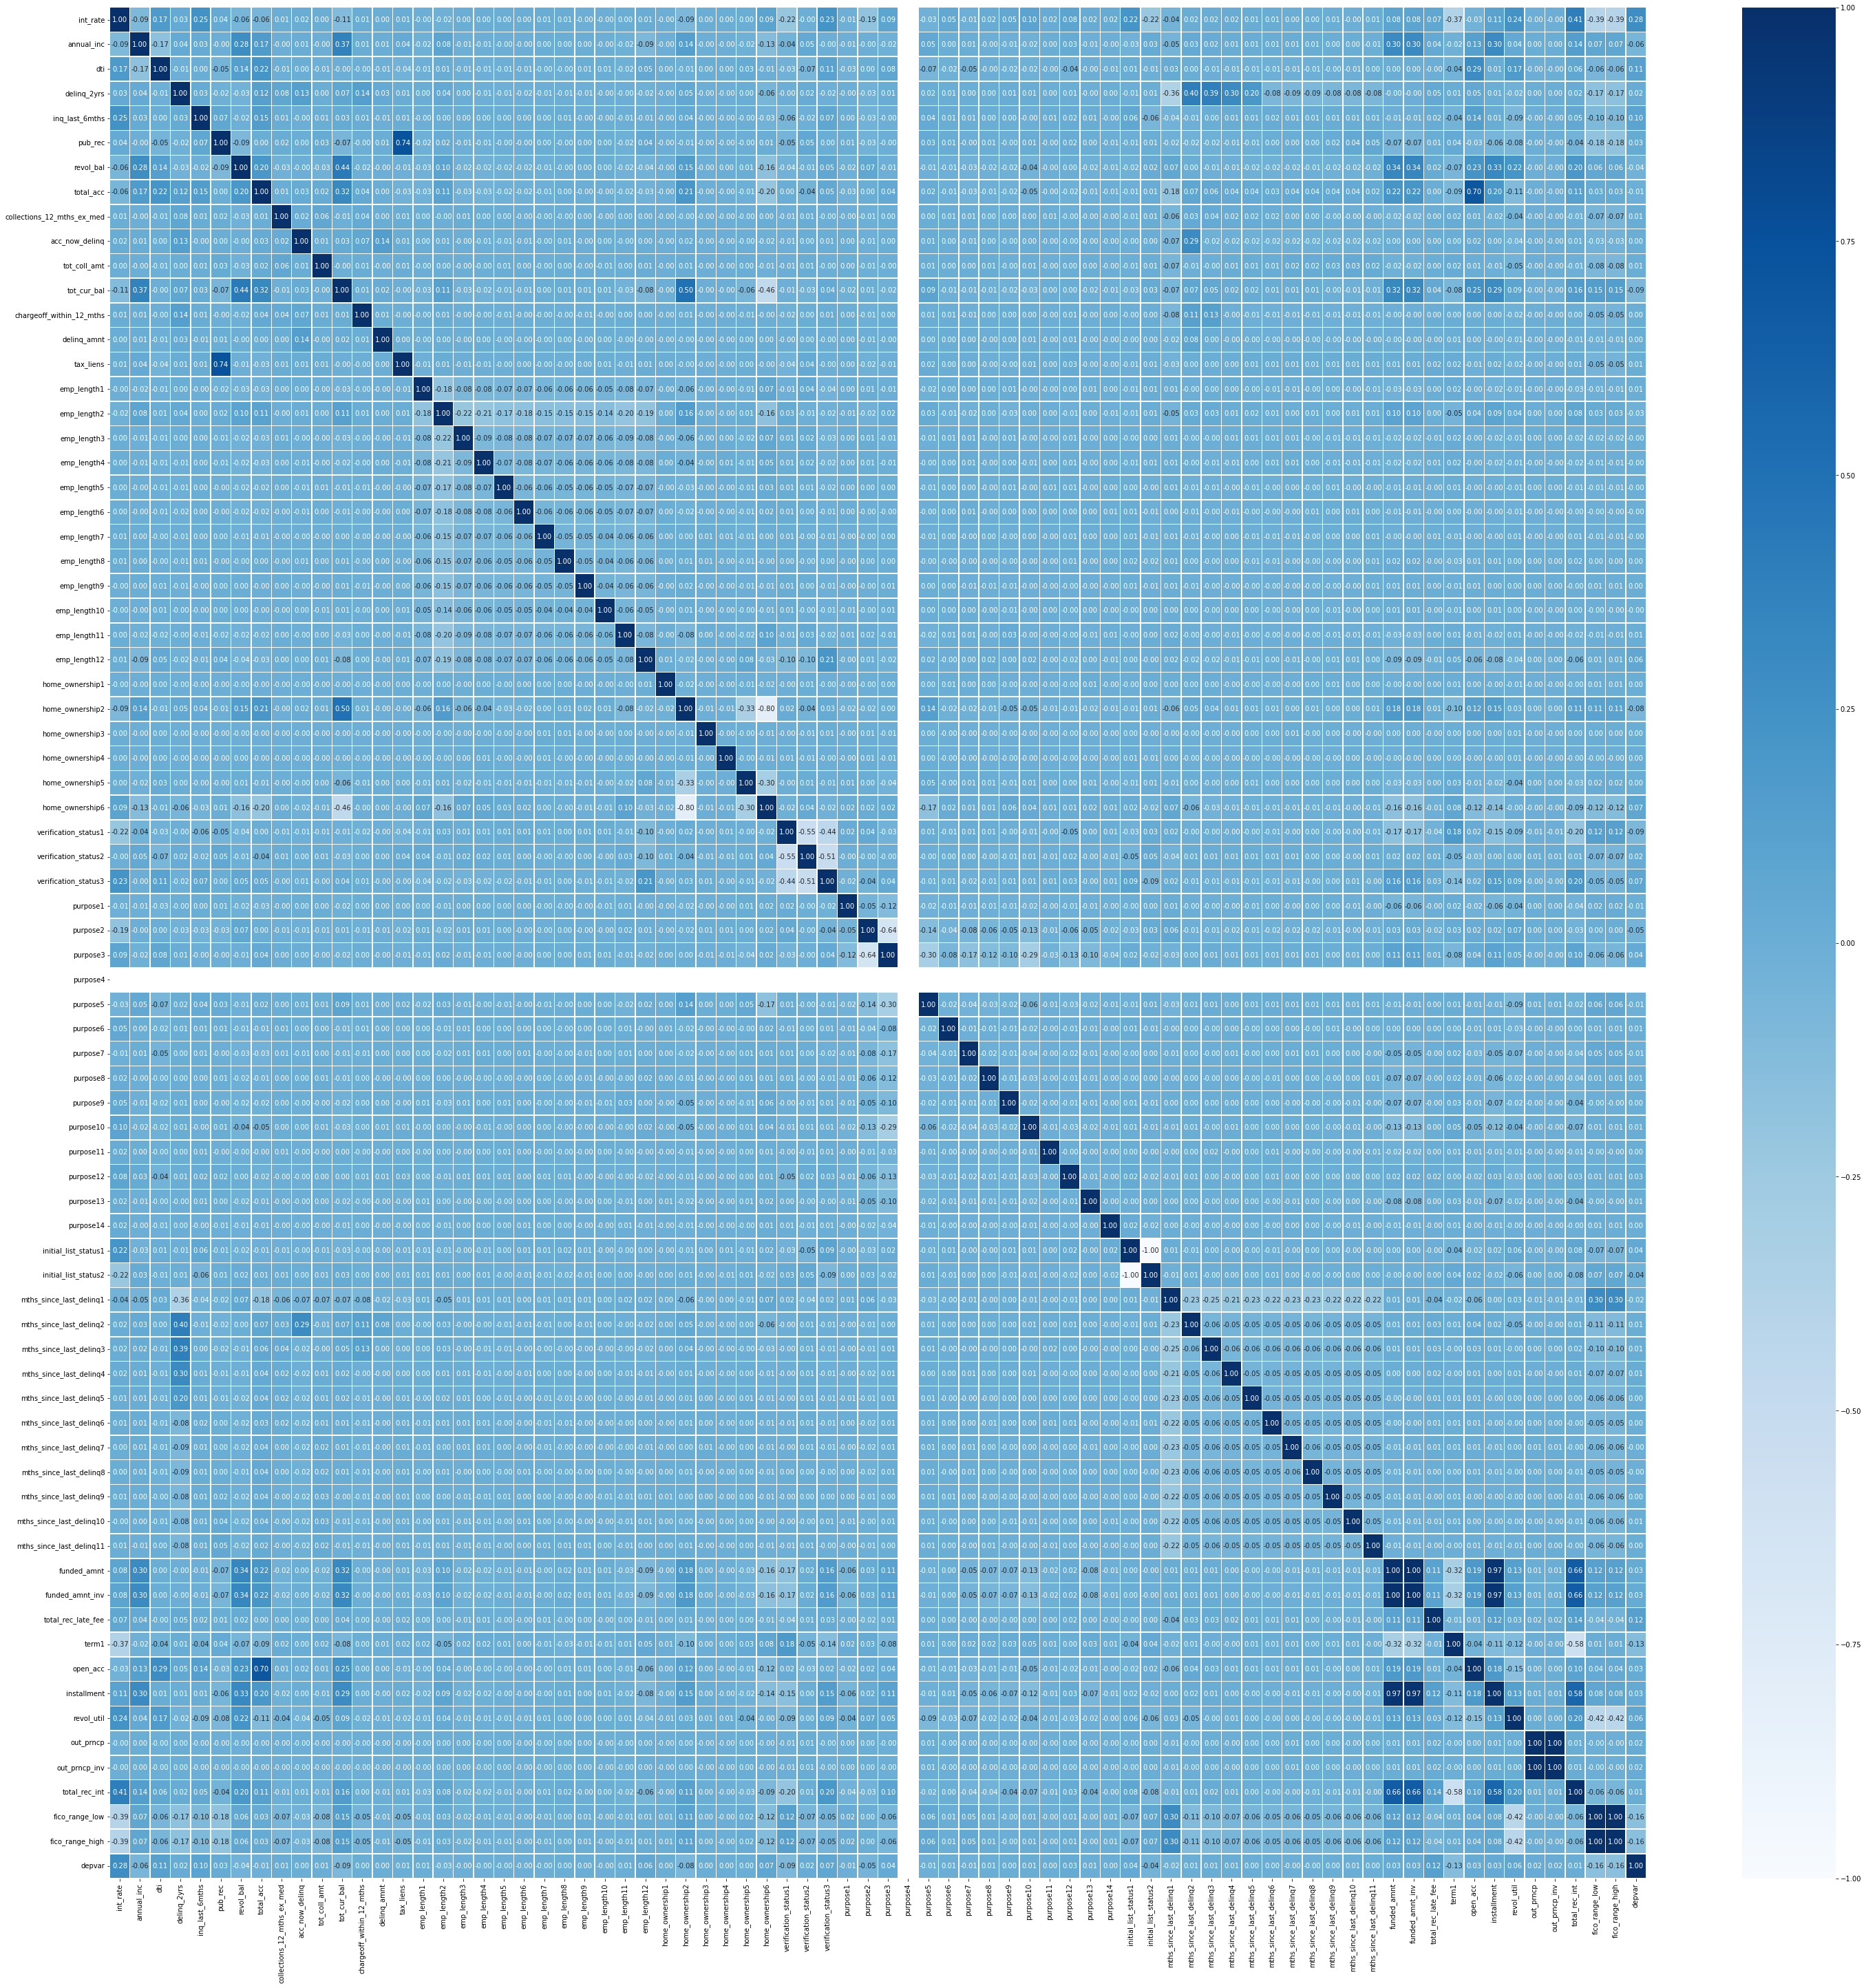

In [ ]:
plt.figure(figsize=(50,50))
sns.heatmap(data=df_corr,annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')


In [ ]:
df_train['term1'].value_counts()

1    85592
0    14408
Name: term1, dtype: int64

In [ ]:
df_train['acc_now_delinq'].value_counts()

0    99459
1      514
2       21
3        3
6        1
5        1
4        1
Name: acc_now_delinq, dtype: int64

In [ ]:
df_train['collections_12_mths_ex_med'].value_counts()

0    98290
1     1568
2      119
3       18
4        4
5        1
Name: collections_12_mths_ex_med, dtype: int64

In [ ]:
df_train.columns

Index(['int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'pub_rec', 'revol_bal', 'total_acc', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens', 'emp_length1',
       'emp_length2', 'emp_length3', 'emp_length4', 'emp_length5',
       'emp_length6', 'emp_length7', 'emp_length8', 'emp_length9',
       'emp_length10', 'emp_length11', 'emp_length12', 'home_ownership1',
       'home_ownership2', 'home_ownership3', 'home_ownership4',
       'home_ownership5', 'home_ownership6', 'verification_status1',
       'verification_status2', 'verification_status3', 'purpose1', 'purpose2',
       'purpose3', 'purpose4', 'purpose5', 'purpose6', 'purpose7', 'purpose8',
       'purpose9', 'purpose10', 'purpose11', 'purpose12', 'purpose13',
       'purpose14', 'initial_list_status1', 'initial_list_status2',
       'mths_since_last_delinq1', 'mths_since_last_delinq2',
       'mths_since_l

In [ ]:
all_col =df_train.columns

In [ ]:
one_hot_columns = ['emp_length1',
       'emp_length2', 'emp_length3', 'emp_length4', 'emp_length5',
       'emp_length6', 'emp_length7', 'emp_length8', 'emp_length9',
       'emp_length10', 'emp_length11', 'emp_length12', 'home_ownership1',
       'home_ownership2', 'home_ownership3', 'home_ownership4',
       'home_ownership5', 'home_ownership6', 'verification_status1',
       'verification_status2', 'verification_status3', 'purpose1', 'purpose2',
       'purpose3', 'purpose4', 'purpose5', 'purpose6', 'purpose7', 'purpose8',
       'purpose9', 'purpose10', 'purpose11', 'purpose12', 'purpose13',
       'purpose14', 'initial_list_status1', 'initial_list_status2',
       'mths_since_last_delinq1', 'mths_since_last_delinq2',
       'mths_since_last_delinq3', 'mths_since_last_delinq4',
       'mths_since_last_delinq5', 'mths_since_last_delinq6',
       'mths_since_last_delinq7', 'mths_since_last_delinq8',
       'mths_since_last_delinq9', 'mths_since_last_delinq10',
       'mths_since_last_delinq11','term1']

In [ ]:
float_columns=[col for col in all_col if col not in one_hot_columns]

In [ ]:
float_columns

['int_rate',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'pub_rec',
 'revol_bal',
 'total_acc',
 'collections_12_mths_ex_med',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens',
 'funded_amnt',
 'funded_amnt_inv',
 'total_rec_late_fee',
 'open_acc',
 'installment',
 'revol_util',
 'out_prncp',
 'out_prncp_inv',
 'total_rec_int',
 'fico_range_low',
 'fico_range_high',
 'depvar']

In [ ]:
df_float_corr=df_train[float_columns].corr()

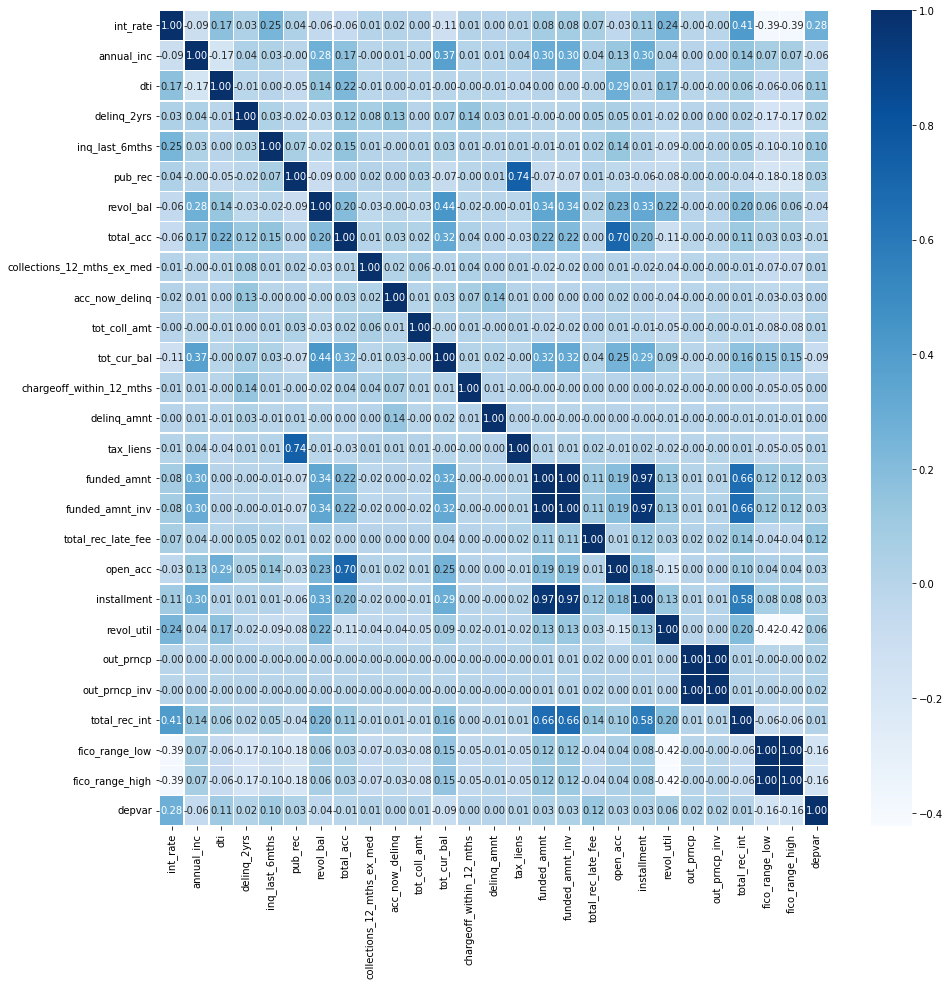

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(data=df_float_corr,annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

int_rate(이자율),fico(신용점수),total_rec_late_fee(총 연체료 중 납부액),dti(소득 대비 부채 비율),inq_last_6mths(지난 6개월 간 신용 조회 수),tot_cur_bal(전 계좌의 현재 통합 잔고) 는 상대적으로 높은 상관관계를 가지고 있다

## one-hot feature 제거 

In [ ]:
df_float_train = df_train[float_columns]


In [ ]:
df_float_train.head()

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,tax_liens,funded_amnt,funded_amnt_inv,total_rec_late_fee,open_acc,installment,revol_util,out_prncp,out_prncp_inv,total_rec_int,fico_range_low,fico_range_high,depvar
0,0.0824,21000.0,29.19,0,1,0,3016,26,0,0,0,11773,0,0,0,1200,1200.0,0.0,18,37.74,0.076,0.0,0.0,157.94,765,769,0
1,0.1299,80000.0,4.82,0,1,1,5722,24,0,0,0,21875,0,0,0,8000,8000.0,0.0,8,269.52,0.447,0.0,0.0,1702.42,665,669,0
2,0.1299,38000.0,23.66,0,3,0,6511,18,0,0,0,31868,0,0,0,5000,5000.0,0.0,7,168.45,0.880,0.0,0.0,1066.64,670,674,0
3,0.1367,100000.0,16.27,4,2,0,6849,30,0,0,0,326049,0,0,0,15000,15000.0,0.0,12,510.27,0.457,0.0,0.0,1256.24,680,684,1
4,0.1269,30000.0,25.28,0,1,2,8197,12,0,0,2506,8840,0,0,0,10000,10000.0,0.0,8,335.45,0.416,0.0,0.0,871.04,660,664,1


In [ ]:
X = df_float_train.drop('depvar',axis=1)
y = df_float_train['depvar']

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3)

In [ ]:
lgbm_clf = LGBMClassifier()
lgbm_clf.fit(X_train,y_train)
y_pred_lgbm = lgbm_clf.predict(X_valid)

In [ ]:
y_pred_prob = lgbm_clf.predict_proba(X_valid)


In [ ]:
y_pred_prob[:,1]

array([0.09289207, 0.60613825, 0.35576158, ..., 0.24119459, 0.10539286,
       0.40579785])

In [ ]:
# 평가 함수 정의
def get_clf_eval(y_actual, y_pred):
    accuracy = accuracy_score(y_actual, y_pred)
    precision = precision_score(y_actual, y_pred)
    recall = recall_score(y_actual, y_pred)
    AUC = roc_auc_score(y_actual, y_pred)
    F1 = f1_score(y_actual, y_pred)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('AUC: {:.4f}'.format(AUC))
    print('F1: {:.4f}'.format(F1))
    
    sns.heatmap(confusion_matrix(y_actual, y_pred), annot=True, fmt='d', cmap='YlGnBu')


정확도: 0.7525
정밀도: 0.6726
재현율: 0.4670
AUC: 0.6787
F1: 0.5513


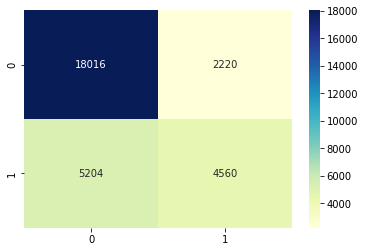

In [ ]:
get_clf_eval(y_valid, y_pred_lgbm)


정확도: 0.7235
정밀도: 0.5567
재현율: 0.7377
AUC: 0.7272
F1: 0.6346


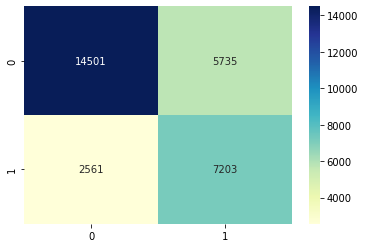

In [ ]:
get_clf_eval(y_valid,y_pred_prob[:,1]>0.3)

In [ ]:
submit = pd.read_csv('/content/drive/MyDrive/year-dream 실습/개인 캐글 대회/data/sample_submission.csv')

In [ ]:
df_test

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,tax_liens,emp_length1,emp_length2,emp_length3,emp_length4,emp_length5,emp_length6,emp_length7,emp_length8,emp_length9,emp_length10,emp_length11,emp_length12,home_ownership1,home_ownership2,home_ownership3,home_ownership4,home_ownership5,home_ownership6,verification_status1,verification_status2,verification_status3,purpose1,purpose2,purpose3,purpose4,purpose5,purpose6,purpose7,purpose8,purpose9,purpose10,purpose11,purpose12,purpose13,purpose14,initial_list_status1,initial_list_status2,mths_since_last_delinq1,mths_since_last_delinq2,mths_since_last_delinq3,mths_since_last_delinq4,mths_since_last_delinq5,mths_since_last_delinq6,mths_since_last_delinq7,mths_since_last_delinq8,mths_since_last_delinq9,mths_since_last_delinq10,mths_since_last_delinq11,funded_amnt,funded_amnt_inv,total_rec_late_fee,term1,open_acc,installment,revol_util,out_prncp,out_prncp_inv,total_rec_int,fico_range_low,fico_range_high,ID
0,0.1449,16380.0,26.08,0,0,1,3486,10,0,0,0,9214,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,8100,8100.0,0.00,1,4,278.78,0.311,0.0,0.0,460.40,700,704,0
1,0.1899,65000.0,13.97,0,0,0,25305,20,0,0,0,115612,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,20000,20000.0,0.00,0,10,518.71,0.885,0.0,0.0,4866.68,675,679,1
2,0.1049,53000.0,23.28,0,0,0,10910,21,0,0,0,33017,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,10000,10000.0,16.25,1,7,324.98,0.580,0.0,0.0,1451.06,675,679,2
3,0.1757,71800.0,30.32,0,0,0,42423,26,0,0,0,152515,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,27200,27200.0,0.00,0,16,684.36,0.701,0.0,0.0,7068.11,665,669,3
4,0.2020,50000.0,25.61,0,2,0,21703,24,0,0,0,135282,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,22000,22000.0,0.00,0,13,585.32,0.622,0.0,0.0,7754.20,710,714,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35811,0.1049,110000.0,9.02,0,0,1,8991,33,0,0,0,17468,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,12000,12000.0,0.00,1,13,389.98,0.346,0.0,0.0,1406.13,665,669,35811
35812,0.0824,45000.0,32.56,1,0,0,20966,29,0,0,0,24802,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,5000,5000.0,0.00,1,9,157.24,0.690,0.0,0.0,495.70,705,709,35812
35813,0.1368,49000.0,17.60,0,0,0,5597,7,0,0,0,20691,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,6000,6000.0,0.00,1,7,204.14,0.333,0.0,0.0,1355.06,705,709,35813
35814,0.1139,84852.0,9.96,0,0,1,7184,13,0,0,0,31396,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,10000,10000.0,0.00,1,8,329.24,0.352,0.0,0.0,1615.15,725,729,35814


In [ ]:
test_float_col=float_columns[:-1]

In [ ]:
df_test=df_test[test_float_col]

In [ ]:
submit['answer'] = lgbm_clf.predict(df_test)


In [ ]:
submit.to_csv('/content/drive/MyDrive/year-dream 실습/개인 캐글 대회/data/prediction_dropcol.csv', index=False)

## Feature engineering


In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/year-dream 실습/개인 캐글 대회/data/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/year-dream 실습/개인 캐글 대회/data/test.csv')

In [ ]:
df_train['train/test'] = 0

In [ ]:
df_train.head()

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,tax_liens,emp_length1,emp_length2,emp_length3,emp_length4,emp_length5,emp_length6,emp_length7,emp_length8,emp_length9,emp_length10,emp_length11,emp_length12,home_ownership1,home_ownership2,home_ownership3,home_ownership4,home_ownership5,home_ownership6,verification_status1,verification_status2,verification_status3,purpose1,purpose2,purpose3,purpose4,purpose5,purpose6,purpose7,purpose8,purpose9,purpose10,purpose11,purpose12,purpose13,purpose14,initial_list_status1,initial_list_status2,mths_since_last_delinq1,mths_since_last_delinq2,mths_since_last_delinq3,mths_since_last_delinq4,mths_since_last_delinq5,mths_since_last_delinq6,mths_since_last_delinq7,mths_since_last_delinq8,mths_since_last_delinq9,mths_since_last_delinq10,mths_since_last_delinq11,funded_amnt,funded_amnt_inv,total_rec_late_fee,term1,open_acc,installment,revol_util,out_prncp,out_prncp_inv,total_rec_int,fico_range_low,fico_range_high,depvar,train/test
0,0.0824,21000.0,29.19,0,1,0,3016,26,0,0,0,11773,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1200,1200.0,0.0,1,18,37.74,0.076,0.0,0.0,157.94,765,769,0,0
1,0.1299,80000.0,4.82,0,1,1,5722,24,0,0,0,21875,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,8000,8000.0,0.0,1,8,269.52,0.447,0.0,0.0,1702.42,665,669,0,0
2,0.1299,38000.0,23.66,0,3,0,6511,18,0,0,0,31868,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,5000,5000.0,0.0,1,7,168.45,0.880,0.0,0.0,1066.64,670,674,0,0
3,0.1367,100000.0,16.27,4,2,0,6849,30,0,0,0,326049,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,15000,15000.0,0.0,1,12,510.27,0.457,0.0,0.0,1256.24,680,684,1,0
4,0.1269,30000.0,25.28,0,1,2,8197,12,0,0,2506,8840,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,10000,10000.0,0.0,1,8,335.45,0.416,0.0,0.0,871.04,660,664,1,0


In [ ]:
df_test['train/test'] =1

In [ ]:
df_test.head()

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,tax_liens,emp_length1,emp_length2,emp_length3,emp_length4,emp_length5,emp_length6,emp_length7,emp_length8,emp_length9,emp_length10,emp_length11,emp_length12,home_ownership1,home_ownership2,home_ownership3,home_ownership4,home_ownership5,home_ownership6,verification_status1,verification_status2,verification_status3,purpose1,purpose2,purpose3,purpose4,purpose5,purpose6,purpose7,purpose8,purpose9,purpose10,purpose11,purpose12,purpose13,purpose14,initial_list_status1,initial_list_status2,mths_since_last_delinq1,mths_since_last_delinq2,mths_since_last_delinq3,mths_since_last_delinq4,mths_since_last_delinq5,mths_since_last_delinq6,mths_since_last_delinq7,mths_since_last_delinq8,mths_since_last_delinq9,mths_since_last_delinq10,mths_since_last_delinq11,funded_amnt,funded_amnt_inv,total_rec_late_fee,term1,open_acc,installment,revol_util,out_prncp,out_prncp_inv,total_rec_int,fico_range_low,fico_range_high,ID,train/test
0,0.1449,16380.0,26.08,0,0,1,3486,10,0,0,0,9214,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,8100,8100.0,0.00,1,4,278.78,0.311,0.0,0.0,460.40,700,704,0,1
1,0.1899,65000.0,13.97,0,0,0,25305,20,0,0,0,115612,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,20000,20000.0,0.00,0,10,518.71,0.885,0.0,0.0,4866.68,675,679,1,1
2,0.1049,53000.0,23.28,0,0,0,10910,21,0,0,0,33017,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,10000,10000.0,16.25,1,7,324.98,0.580,0.0,0.0,1451.06,675,679,2,1
3,0.1757,71800.0,30.32,0,0,0,42423,26,0,0,0,152515,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,27200,27200.0,0.00,0,16,684.36,0.701,0.0,0.0,7068.11,665,669,3,1
4,0.2020,50000.0,25.61,0,2,0,21703,24,0,0,0,135282,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,22000,22000.0,0.00,0,13,585.32,0.622,0.0,0.0,7754.20,710,714,4,1


In [ ]:
df_train.columns

Index(['int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'pub_rec', 'revol_bal', 'total_acc', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens', 'emp_length1',
       'emp_length2', 'emp_length3', 'emp_length4', 'emp_length5',
       'emp_length6', 'emp_length7', 'emp_length8', 'emp_length9',
       'emp_length10', 'emp_length11', 'emp_length12', 'home_ownership1',
       'home_ownership2', 'home_ownership3', 'home_ownership4',
       'home_ownership5', 'home_ownership6', 'verification_status1',
       'verification_status2', 'verification_status3', 'purpose1', 'purpose2',
       'purpose3', 'purpose4', 'purpose5', 'purpose6', 'purpose7', 'purpose8',
       'purpose9', 'purpose10', 'purpose11', 'purpose12', 'purpose13',
       'purpose14', 'initial_list_status1', 'initial_list_status2',
       'mths_since_last_delinq1', 'mths_since_last_delinq2',
       'mths_since_l

In [ ]:
df_test.columns

Index(['int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'pub_rec', 'revol_bal', 'total_acc', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens', 'emp_length1',
       'emp_length2', 'emp_length3', 'emp_length4', 'emp_length5',
       'emp_length6', 'emp_length7', 'emp_length8', 'emp_length9',
       'emp_length10', 'emp_length11', 'emp_length12', 'home_ownership1',
       'home_ownership2', 'home_ownership3', 'home_ownership4',
       'home_ownership5', 'home_ownership6', 'verification_status1',
       'verification_status2', 'verification_status3', 'purpose1', 'purpose2',
       'purpose3', 'purpose4', 'purpose5', 'purpose6', 'purpose7', 'purpose8',
       'purpose9', 'purpose10', 'purpose11', 'purpose12', 'purpose13',
       'purpose14', 'initial_list_status1', 'initial_list_status2',
       'mths_since_last_delinq1', 'mths_since_last_delinq2',
       'mths_since_l

In [ ]:
df_test.ID

0            0
1            1
2            2
3            3
4            4
         ...  
35811    35811
35812    35812
35813    35813
35814    35814
35815    35815
Name: ID, Length: 35816, dtype: int64

In [ ]:
df_train = df_train.drop('depvar',axis=1)
df_train_y = y

In [ ]:
df_train

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,tax_liens,emp_length1,emp_length2,emp_length3,emp_length4,emp_length5,emp_length6,emp_length7,emp_length8,emp_length9,emp_length10,emp_length11,emp_length12,home_ownership1,home_ownership2,home_ownership3,home_ownership4,home_ownership5,home_ownership6,verification_status1,verification_status2,verification_status3,purpose1,purpose2,purpose3,purpose4,purpose5,purpose6,purpose7,purpose8,purpose9,purpose10,purpose11,purpose12,purpose13,purpose14,initial_list_status1,initial_list_status2,mths_since_last_delinq1,mths_since_last_delinq2,mths_since_last_delinq3,mths_since_last_delinq4,mths_since_last_delinq5,mths_since_last_delinq6,mths_since_last_delinq7,mths_since_last_delinq8,mths_since_last_delinq9,mths_since_last_delinq10,mths_since_last_delinq11,funded_amnt,funded_amnt_inv,total_rec_late_fee,term1,open_acc,installment,revol_util,out_prncp,out_prncp_inv,total_rec_int,fico_range_low,fico_range_high,train/test
0,0.0824,21000.0,29.19,0,1,0,3016,26,0,0,0,11773,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1200,1200.0,0.0,1,18,37.74,0.076,0.0,0.0,157.94,765,769,0
1,0.1299,80000.0,4.82,0,1,1,5722,24,0,0,0,21875,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,8000,8000.0,0.0,1,8,269.52,0.447,0.0,0.0,1702.42,665,669,0
2,0.1299,38000.0,23.66,0,3,0,6511,18,0,0,0,31868,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,5000,5000.0,0.0,1,7,168.45,0.880,0.0,0.0,1066.64,670,674,0
3,0.1367,100000.0,16.27,4,2,0,6849,30,0,0,0,326049,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,15000,15000.0,0.0,1,12,510.27,0.457,0.0,0.0,1256.24,680,684,0
4,0.1269,30000.0,25.28,0,1,2,8197,12,0,0,2506,8840,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,10000,10000.0,0.0,1,8,335.45,0.416,0.0,0.0,871.04,660,664,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.1757,65000.0,17.67,0,3,1,11255,21,1,0,0,26570,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,20000,20000.0,0.0,1,13,718.75,0.780,0.0,0.0,5373.29,660,664,0
99996,0.0890,65000.0,2.88,0,0,0,2105,12,0,0,0,6138,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,6000,6000.0,0.0,1,7,190.52,0.120,0.0,0.0,835.66,765,769,0
99997,0.1349,46000.0,32.12,0,1,0,8998,20,0,0,0,96531,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,6400,6400.0,0.0,1,19,217.16,0.643,0.0,0.0,1261.67,665,669,0
99998,0.2115,31000.0,4.53,0,1,0,3875,4,0,0,0,3875,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,5500,5500.0,0.0,1,3,207.64,0.731,0.0,0.0,1357.69,710,714,0


In [ ]:
df_test = df_test.drop('ID',axis=1)

In [ ]:
df_test

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,tax_liens,emp_length1,emp_length2,emp_length3,emp_length4,emp_length5,emp_length6,emp_length7,emp_length8,emp_length9,emp_length10,emp_length11,emp_length12,home_ownership1,home_ownership2,home_ownership3,home_ownership4,home_ownership5,home_ownership6,verification_status1,verification_status2,verification_status3,purpose1,purpose2,purpose3,purpose4,purpose5,purpose6,purpose7,purpose8,purpose9,purpose10,purpose11,purpose12,purpose13,purpose14,initial_list_status1,initial_list_status2,mths_since_last_delinq1,mths_since_last_delinq2,mths_since_last_delinq3,mths_since_last_delinq4,mths_since_last_delinq5,mths_since_last_delinq6,mths_since_last_delinq7,mths_since_last_delinq8,mths_since_last_delinq9,mths_since_last_delinq10,mths_since_last_delinq11,funded_amnt,funded_amnt_inv,total_rec_late_fee,term1,open_acc,installment,revol_util,out_prncp,out_prncp_inv,total_rec_int,fico_range_low,fico_range_high,train/test
0,0.1449,16380.0,26.08,0,0,1,3486,10,0,0,0,9214,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,8100,8100.0,0.00,1,4,278.78,0.311,0.0,0.0,460.40,700,704,1
1,0.1899,65000.0,13.97,0,0,0,25305,20,0,0,0,115612,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,20000,20000.0,0.00,0,10,518.71,0.885,0.0,0.0,4866.68,675,679,1
2,0.1049,53000.0,23.28,0,0,0,10910,21,0,0,0,33017,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,10000,10000.0,16.25,1,7,324.98,0.580,0.0,0.0,1451.06,675,679,1
3,0.1757,71800.0,30.32,0,0,0,42423,26,0,0,0,152515,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,27200,27200.0,0.00,0,16,684.36,0.701,0.0,0.0,7068.11,665,669,1
4,0.2020,50000.0,25.61,0,2,0,21703,24,0,0,0,135282,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,22000,22000.0,0.00,0,13,585.32,0.622,0.0,0.0,7754.20,710,714,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35811,0.1049,110000.0,9.02,0,0,1,8991,33,0,0,0,17468,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,12000,12000.0,0.00,1,13,389.98,0.346,0.0,0.0,1406.13,665,669,1
35812,0.0824,45000.0,32.56,1,0,0,20966,29,0,0,0,24802,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,5000,5000.0,0.00,1,9,157.24,0.690,0.0,0.0,495.70,705,709,1
35813,0.1368,49000.0,17.60,0,0,0,5597,7,0,0,0,20691,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,6000,6000.0,0.00,1,7,204.14,0.333,0.0,0.0,1355.06,705,709,1
35814,0.1139,84852.0,9.96,0,0,1,7184,13,0,0,0,31396,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,10000,10000.0,0.00,1,8,329.24,0.352,0.0,0.0,1615.15,725,729,1


In [ ]:
df_con = pd.concat([df_train,df_test],ignore_index=True)

In [ ]:
df_con.head()

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,tax_liens,emp_length1,emp_length2,emp_length3,emp_length4,emp_length5,emp_length6,emp_length7,emp_length8,emp_length9,emp_length10,emp_length11,emp_length12,home_ownership1,home_ownership2,home_ownership3,home_ownership4,home_ownership5,home_ownership6,verification_status1,verification_status2,verification_status3,purpose1,purpose2,purpose3,purpose4,purpose5,purpose6,purpose7,purpose8,purpose9,purpose10,purpose11,purpose12,purpose13,purpose14,initial_list_status1,initial_list_status2,mths_since_last_delinq1,mths_since_last_delinq2,mths_since_last_delinq3,mths_since_last_delinq4,mths_since_last_delinq5,mths_since_last_delinq6,mths_since_last_delinq7,mths_since_last_delinq8,mths_since_last_delinq9,mths_since_last_delinq10,mths_since_last_delinq11,funded_amnt,funded_amnt_inv,total_rec_late_fee,term1,open_acc,installment,revol_util,out_prncp,out_prncp_inv,total_rec_int,fico_range_low,fico_range_high,train/test
0,0.0824,21000.0,29.19,0,1,0,3016,26,0,0,0,11773,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1200,1200.0,0.0,1,18,37.74,0.076,0.0,0.0,157.94,765,769,0
1,0.1299,80000.0,4.82,0,1,1,5722,24,0,0,0,21875,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,8000,8000.0,0.0,1,8,269.52,0.447,0.0,0.0,1702.42,665,669,0
2,0.1299,38000.0,23.66,0,3,0,6511,18,0,0,0,31868,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,5000,5000.0,0.0,1,7,168.45,0.880,0.0,0.0,1066.64,670,674,0
3,0.1367,100000.0,16.27,4,2,0,6849,30,0,0,0,326049,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,15000,15000.0,0.0,1,12,510.27,0.457,0.0,0.0,1256.24,680,684,0
4,0.1269,30000.0,25.28,0,1,2,8197,12,0,0,2506,8840,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,10000,10000.0,0.0,1,8,335.45,0.416,0.0,0.0,871.04,660,664,0


In [ ]:
df_con.columns

Index(['int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'pub_rec', 'revol_bal', 'total_acc', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens', 'emp_length1',
       'emp_length2', 'emp_length3', 'emp_length4', 'emp_length5',
       'emp_length6', 'emp_length7', 'emp_length8', 'emp_length9',
       'emp_length10', 'emp_length11', 'emp_length12', 'home_ownership1',
       'home_ownership2', 'home_ownership3', 'home_ownership4',
       'home_ownership5', 'home_ownership6', 'verification_status1',
       'verification_status2', 'verification_status3', 'purpose1', 'purpose2',
       'purpose3', 'purpose4', 'purpose5', 'purpose6', 'purpose7', 'purpose8',
       'purpose9', 'purpose10', 'purpose11', 'purpose12', 'purpose13',
       'purpose14', 'initial_list_status1', 'initial_list_status2',
       'mths_since_last_delinq1', 'mths_since_last_delinq2',
       'mths_since_l

### emp_length1~12 하나의 컬럼으로 합쳐주기

In [ ]:
df_con[['emp_length1',
       'emp_length2', 'emp_length3', 'emp_length4', 'emp_length5',
       'emp_length6', 'emp_length7', 'emp_length8', 'emp_length9',
       'emp_length10', 'emp_length11', 'emp_length12']]

,emp_length1,emp_length2,emp_length3,emp_length4,emp_length5,emp_length6,emp_length7,emp_length8,emp_length9,emp_length10,emp_length11,emp_length12
0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
135811,0,1,0,0,0,0,0,0,0,0,0,0
135812,1,0,0,0,0,0,0,0,0,0,0,0
135813,0,0,1,0,0,0,0,0,0,0,0,0
135814,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
df_con['emp_length'] = 0

In [ ]:
df_con.head()

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,tax_liens,emp_length1,emp_length2,emp_length3,emp_length4,emp_length5,emp_length6,emp_length7,emp_length8,emp_length9,emp_length10,emp_length11,emp_length12,home_ownership1,home_ownership2,home_ownership3,home_ownership4,home_ownership5,home_ownership6,verification_status1,verification_status2,verification_status3,purpose1,purpose2,purpose3,purpose4,purpose5,purpose6,purpose7,purpose8,purpose9,purpose10,purpose11,purpose12,purpose13,purpose14,initial_list_status1,initial_list_status2,mths_since_last_delinq1,mths_since_last_delinq2,mths_since_last_delinq3,mths_since_last_delinq4,mths_since_last_delinq5,mths_since_last_delinq6,mths_since_last_delinq7,mths_since_last_delinq8,mths_since_last_delinq9,mths_since_last_delinq10,mths_since_last_delinq11,funded_amnt,funded_amnt_inv,total_rec_late_fee,term1,open_acc,installment,revol_util,out_prncp,out_prncp_inv,total_rec_int,fico_range_low,fico_range_high,train/test,emp_length
0,0.0824,21000.0,29.19,0,1,0,3016,26,0,0,0,11773,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1200,1200.0,0.0,1,18,37.74,0.076,0.0,0.0,157.94,765,769,0,1
1,0.1299,80000.0,4.82,0,1,1,5722,24,0,0,0,21875,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,8000,8000.0,0.0,1,8,269.52,0.447,0.0,0.0,1702.42,665,669,0,2
2,0.1299,38000.0,23.66,0,3,0,6511,18,0,0,0,31868,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,5000,5000.0,0.0,1,7,168.45,0.880,0.0,0.0,1066.64,670,674,0,4
3,0.1367,100000.0,16.27,4,2,0,6849,30,0,0,0,326049,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,15000,15000.0,0.0,1,12,510.27,0.457,0.0,0.0,1256.24,680,684,0,3
4,0.1269,30000.0,25.28,0,1,2,8197,12,0,0,2506,8840,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,10000,10000.0,0.0,1,8,335.45,0.416,0.0,0.0,871.04,660,664,0,4


In [ ]:
from tqdm import tqdm 

In [ ]:
for i in tqdm(range(len(df_con))):      
    if df_con['emp_length1'][i] == 1:
        df_con['emp_length'][i] = 1
    elif df_con['emp_length2'][i] == 1:
        df_con['emp_length'][i] = 2
    elif df_con['emp_length3'][i] == 1:
        df_con['emp_length'][i] = 3
    elif df_con['emp_length4'][i] == 1:
        df_con['emp_length'][i] = 4        
    elif df_con['emp_length5'][i] == 1:
        df_con['emp_length'][i] = 5
    elif df_con['emp_length6'][i] == 1:
        df_con['emp_length'][i] = 6
    elif df_con['emp_length7'][i] == 1:
        df_con['emp_length'][i] = 7        
    elif df_con['emp_length8'][i] == 1:
        df_con['emp_length'][i] = 8
    elif df_con['emp_length9'][i] == 1:
        df_con['emp_length'][i] = 9
    elif df_con['emp_length10'][i] == 1:
        df_con['emp_length'][i] = 10        
    elif df_con['emp_length11'][i] == 1:
        df_con['emp_length'][i] = 11
    elif df_con['emp_length12'][i] == 1:
        df_con['emp_length'][i] = 12
   


100%|██████████| 135816/135816 [00:17<00:00, 7846.10it/s]


In [ ]:
df_con.emp_length

0         1
1         2
2         4
3         3
4         4
         ..
135811    2
135812    1
135813    3
135814    3
135815    2
Name: emp_length, Length: 135816, dtype: int64

In [ ]:
df_con.drop(['emp_length1',
       'emp_length2', 'emp_length3', 'emp_length4', 'emp_length5',
       'emp_length6', 'emp_length7', 'emp_length8', 'emp_length9',
       'emp_length10', 'emp_length11', 'emp_length12'],axis=1,inplace=True) 

In [ ]:
df_con

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,tax_liens,home_ownership1,home_ownership2,home_ownership3,home_ownership4,home_ownership5,home_ownership6,verification_status1,verification_status2,verification_status3,purpose1,purpose2,purpose3,purpose4,purpose5,purpose6,purpose7,purpose8,purpose9,purpose10,purpose11,purpose12,purpose13,purpose14,initial_list_status1,initial_list_status2,mths_since_last_delinq1,mths_since_last_delinq2,mths_since_last_delinq3,mths_since_last_delinq4,mths_since_last_delinq5,mths_since_last_delinq6,mths_since_last_delinq7,mths_since_last_delinq8,mths_since_last_delinq9,mths_since_last_delinq10,mths_since_last_delinq11,funded_amnt,funded_amnt_inv,total_rec_late_fee,term1,open_acc,installment,revol_util,out_prncp,out_prncp_inv,total_rec_int,fico_range_low,fico_range_high,train/test,emp_length
0,0.0824,21000.0,29.19,0,1,0,3016,26,0,0,0,11773,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1200,1200.0,0.0,1,18,37.74,0.076,0.0,0.0,157.94,765,769,0,1
1,0.1299,80000.0,4.82,0,1,1,5722,24,0,0,0,21875,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,8000,8000.0,0.0,1,8,269.52,0.447,0.0,0.0,1702.42,665,669,0,2
2,0.1299,38000.0,23.66,0,3,0,6511,18,0,0,0,31868,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,5000,5000.0,0.0,1,7,168.45,0.880,0.0,0.0,1066.64,670,674,0,4
3,0.1367,100000.0,16.27,4,2,0,6849,30,0,0,0,326049,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,15000,15000.0,0.0,1,12,510.27,0.457,0.0,0.0,1256.24,680,684,0,3
4,0.1269,30000.0,25.28,0,1,2,8197,12,0,0,2506,8840,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,10000,10000.0,0.0,1,8,335.45,0.416,0.0,0.0,871.04,660,664,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135811,0.1049,110000.0,9.02,0,0,1,8991,33,0,0,0,17468,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,12000,12000.0,0.0,1,13,389.98,0.346,0.0,0.0,1406.13,665,669,1,2
135812,0.0824,45000.0,32.56,1,0,0,20966,29,0,0,0,24802,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,5000,5000.0,0.0,1,9,157.24,0.690,0.0,0.0,495.70,705,709,1,1
135813,0.1368,49000.0,17.60,0,0,0,5597,7,0,0,0,20691,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,6000,6000.0,0.0,1,7,204.14,0.333,0.0,0.0,1355.06,705,709,1,3
135814,0.1139,84852.0,9.96,0,0,1,7184,13,0,0,0,31396,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,10000,10000.0,0.0,1,8,329.24,0.352,0.0,0.0,1615.15,725,729,1,3


### month_since_last_delinq1~11 하나의 컬럼으로 합쳐주기

In [ ]:
df_con.columns

Index(['int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'pub_rec', 'revol_bal', 'total_acc', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens',
       'home_ownership1', 'home_ownership2', 'home_ownership3',
       'home_ownership4', 'home_ownership5', 'home_ownership6',
       'verification_status1', 'verification_status2', 'verification_status3',
       'purpose1', 'purpose2', 'purpose3', 'purpose4', 'purpose5', 'purpose6',
       'purpose7', 'purpose8', 'purpose9', 'purpose10', 'purpose11',
       'purpose12', 'purpose13', 'purpose14', 'initial_list_status1',
       'initial_list_status2', 'mths_since_last_delinq1',
       'mths_since_last_delinq2', 'mths_since_last_delinq3',
       'mths_since_last_delinq4', 'mths_since_last_delinq5',
       'mths_since_last_delinq6', 'mths_since_last_delinq7',
       'mths_since_last_delinq8', 'mths_since_last_delinq9',
       

In [ ]:
df_con[['mths_since_last_delinq1',
       'mths_since_last_delinq2', 'mths_since_last_delinq3',
       'mths_since_last_delinq4', 'mths_since_last_delinq5',
       'mths_since_last_delinq6', 'mths_since_last_delinq7',
       'mths_since_last_delinq8', 'mths_since_last_delinq9',
       'mths_since_last_delinq10', 'mths_since_last_delinq11']]

,mths_since_last_delinq1,mths_since_last_delinq2,mths_since_last_delinq3,mths_since_last_delinq4,mths_since_last_delinq5,mths_since_last_delinq6,mths_since_last_delinq7,mths_since_last_delinq8,mths_since_last_delinq9,mths_since_last_delinq10,mths_since_last_delinq11
0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
135811,1,0,0,0,0,0,0,0,0,0,0
135812,0,0,1,0,0,0,0,0,0,0,0
135813,1,0,0,0,0,0,0,0,0,0,0
135814,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_con['mths_since_last_delinq'] = 0

In [ ]:
df_con

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,tax_liens,home_ownership1,home_ownership2,home_ownership3,home_ownership4,home_ownership5,home_ownership6,verification_status1,verification_status2,verification_status3,purpose1,purpose2,purpose3,purpose4,purpose5,purpose6,purpose7,purpose8,purpose9,purpose10,purpose11,purpose12,purpose13,purpose14,initial_list_status1,initial_list_status2,mths_since_last_delinq1,mths_since_last_delinq2,mths_since_last_delinq3,mths_since_last_delinq4,mths_since_last_delinq5,mths_since_last_delinq6,mths_since_last_delinq7,mths_since_last_delinq8,mths_since_last_delinq9,mths_since_last_delinq10,mths_since_last_delinq11,funded_amnt,funded_amnt_inv,total_rec_late_fee,term1,open_acc,installment,revol_util,out_prncp,out_prncp_inv,total_rec_int,fico_range_low,fico_range_high,train/test,emp_length,mths_since_last_delinq
0,0.0824,21000.0,29.19,0,1,0,3016,26,0,0,0,11773,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1200,1200.0,0.0,1,18,37.74,0.076,0.0,0.0,157.94,765,769,0,1,0
1,0.1299,80000.0,4.82,0,1,1,5722,24,0,0,0,21875,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,8000,8000.0,0.0,1,8,269.52,0.447,0.0,0.0,1702.42,665,669,0,2,0
2,0.1299,38000.0,23.66,0,3,0,6511,18,0,0,0,31868,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,5000,5000.0,0.0,1,7,168.45,0.880,0.0,0.0,1066.64,670,674,0,4,0
3,0.1367,100000.0,16.27,4,2,0,6849,30,0,0,0,326049,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,15000,15000.0,0.0,1,12,510.27,0.457,0.0,0.0,1256.24,680,684,0,3,0
4,0.1269,30000.0,25.28,0,1,2,8197,12,0,0,2506,8840,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,10000,10000.0,0.0,1,8,335.45,0.416,0.0,0.0,871.04,660,664,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135811,0.1049,110000.0,9.02,0,0,1,8991,33,0,0,0,17468,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,12000,12000.0,0.0,1,13,389.98,0.346,0.0,0.0,1406.13,665,669,1,2,0
135812,0.0824,45000.0,32.56,1,0,0,20966,29,0,0,0,24802,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,5000,5000.0,0.0,1,9,157.24,0.690,0.0,0.0,495.70,705,709,1,1,0
135813,0.1368,49000.0,17.60,0,0,0,5597,7,0,0,0,20691,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,6000,6000.0,0.0,1,7,204.14,0.333,0.0,0.0,1355.06,705,709,1,3,0
135814,0.1139,84852.0,9.96,0,0,1,7184,13,0,0,0,31396,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,10000,10000.0,0.0,1,8,329.24,0.352,0.0,0.0,1615.15,725,729,1,3,0


In [ ]:
for i in tqdm(range(len(df_con))):      
    if df_con['mths_since_last_delinq1'][i] == 1:
        df_con['mths_since_last_delinq'][i] = 1
    elif df_con['mths_since_last_delinq2'][i] == 1:
        df_con['mths_since_last_delinq'][i] = 2
    elif df_con['mths_since_last_delinq3'][i] == 1:
        df_con['mths_since_last_delinq'][i] = 3
    elif df_con['mths_since_last_delinq4'][i] == 1:
        df_con['mths_since_last_delinq'][i] = 4        
    elif df_con['mths_since_last_delinq5'][i] == 1:
        df_con['mths_since_last_delinq'][i] = 5
    elif df_con['mths_since_last_delinq6'][i] == 1:
        df_con['mths_since_last_delinq'][i] = 6
    elif df_con['mths_since_last_delinq7'][i] == 1:
        df_con['mths_since_last_delinq'][i] = 7        
    elif df_con['mths_since_last_delinq8'][i] == 1:
        df_con['mths_since_last_delinq'][i] = 8
    elif df_con['mths_since_last_delinq9'][i] == 1:
        df_con['mths_since_last_delinq'][i] = 9
    elif df_con['mths_since_last_delinq10'][i] == 1:
        df_con['mths_since_last_delinq'][i] = 10        
    elif df_con['mths_since_last_delinq11'][i] == 1:
        df_con['mths_since_last_delinq'][i] = 11



100%|██████████| 135816/135816 [00:16<00:00, 8277.99it/s]


In [ ]:
df_con['mths_since_last_delinq'].head()

0     1
1     1
2    11
3     5
4     1
Name: mths_since_last_delinq, dtype: int64

In [ ]:
df_con.drop(['mths_since_last_delinq1',
       'mths_since_last_delinq2', 'mths_since_last_delinq3',
       'mths_since_last_delinq4', 'mths_since_last_delinq5',
       'mths_since_last_delinq6', 'mths_since_last_delinq7',
       'mths_since_last_delinq8', 'mths_since_last_delinq9',
       'mths_since_last_delinq10', 'mths_since_last_delinq11'],axis=1, inplace=True)

In [ ]:
df_con.columns

Index(['int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'pub_rec', 'revol_bal', 'total_acc', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens',
       'home_ownership1', 'home_ownership2', 'home_ownership3',
       'home_ownership4', 'home_ownership5', 'home_ownership6',
       'verification_status1', 'verification_status2', 'verification_status3',
       'purpose1', 'purpose2', 'purpose3', 'purpose4', 'purpose5', 'purpose6',
       'purpose7', 'purpose8', 'purpose9', 'purpose10', 'purpose11',
       'purpose12', 'purpose13', 'purpose14', 'initial_list_status1',
       'initial_list_status2', 'funded_amnt', 'funded_amnt_inv',
       'total_rec_late_fee', 'term1', 'open_acc', 'installment', 'revol_util',
       'out_prncp', 'out_prncp_inv', 'total_rec_int', 'fico_range_low',
       'fico_range_high', 'train/test', 'emp_length',
       'mths_since_last_delinq'],
     

In [ ]:
df_con.columns

Index(['int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'pub_rec', 'revol_bal', 'total_acc', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens',
       'home_ownership1', 'home_ownership2', 'home_ownership3',
       'home_ownership4', 'home_ownership5', 'home_ownership6',
       'verification_status1', 'verification_status2', 'verification_status3',
       'purpose1', 'purpose2', 'purpose3', 'purpose4', 'purpose5', 'purpose6',
       'purpose7', 'purpose8', 'purpose9', 'purpose10', 'purpose11',
       'purpose12', 'purpose13', 'purpose14', 'initial_list_status1',
       'initial_list_status2', 'funded_amnt', 'funded_amnt_inv',
       'total_rec_late_fee', 'term1', 'open_acc', 'installment', 'revol_util',
       'out_prncp', 'out_prncp_inv', 'total_rec_int', 'fico_range_low',
       'fico_range_high', 'train/test', 'emp_length',
       'mths_since_last_delinq'],
     

In [ ]:
df_con=df_con[['int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'pub_rec', 'revol_bal', 'total_acc', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens','emp_length',
       'home_ownership1', 'home_ownership2', 'home_ownership3',
       'home_ownership4', 'home_ownership5', 'home_ownership6',
       'verification_status1', 'verification_status2', 'verification_status3',
       'purpose1', 'purpose2', 'purpose3', 'purpose4', 'purpose5', 'purpose6',
       'purpose7', 'purpose8', 'purpose9', 'purpose10', 'purpose11',
       'purpose12', 'purpose13', 'purpose14', 'initial_list_status1',
       'initial_list_status2','mths_since_last_delinq', 'funded_amnt', 'funded_amnt_inv',
       'total_rec_late_fee', 'term1', 'open_acc', 'installment', 'revol_util',
       'out_prncp', 'out_prncp_inv', 'total_rec_int', 'fico_range_low',
       'fico_range_high', 'train/test',]]  #컬럼순서 재배치

In [ ]:
df_less_col_train = df_con[(df_con['train/test']==0)]  #트레인 테스트 다시 분리

In [ ]:
df_less_col_train.head()

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,tax_liens,emp_length,home_ownership1,home_ownership2,home_ownership3,home_ownership4,home_ownership5,home_ownership6,verification_status1,verification_status2,verification_status3,purpose1,purpose2,purpose3,purpose4,purpose5,purpose6,purpose7,purpose8,purpose9,purpose10,purpose11,purpose12,purpose13,purpose14,initial_list_status1,initial_list_status2,mths_since_last_delinq,funded_amnt,funded_amnt_inv,total_rec_late_fee,term1,open_acc,installment,revol_util,out_prncp,out_prncp_inv,total_rec_int,fico_range_low,fico_range_high,train/test
0,0.0824,21000.0,29.19,0,1,0,3016,26,0,0,0,11773,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1200,1200.0,0.0,1,18,37.74,0.076,0.0,0.0,157.94,765,769,0
1,0.1299,80000.0,4.82,0,1,1,5722,24,0,0,0,21875,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,8000,8000.0,0.0,1,8,269.52,0.447,0.0,0.0,1702.42,665,669,0
2,0.1299,38000.0,23.66,0,3,0,6511,18,0,0,0,31868,0,0,0,4,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,11,5000,5000.0,0.0,1,7,168.45,0.880,0.0,0.0,1066.64,670,674,0
3,0.1367,100000.0,16.27,4,2,0,6849,30,0,0,0,326049,0,0,0,3,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,5,15000,15000.0,0.0,1,12,510.27,0.457,0.0,0.0,1256.24,680,684,0
4,0.1269,30000.0,25.28,0,1,2,8197,12,0,0,2506,8840,0,0,0,4,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,10000,10000.0,0.0,1,8,335.45,0.416,0.0,0.0,871.04,660,664,0


In [ ]:
y

0        0
1        0
2        0
3        1
4        1
        ..
99995    1
99996    0
99997    0
99998    1
99999    0
Name: depvar, Length: 100000, dtype: int64

In [ ]:
df_less_col_train.head()

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,tax_liens,emp_length,home_ownership1,home_ownership2,home_ownership3,home_ownership4,home_ownership5,home_ownership6,verification_status1,verification_status2,verification_status3,purpose1,purpose2,purpose3,purpose4,purpose5,purpose6,purpose7,purpose8,purpose9,purpose10,purpose11,purpose12,purpose13,purpose14,initial_list_status1,initial_list_status2,mths_since_last_delinq,funded_amnt,funded_amnt_inv,total_rec_late_fee,term1,open_acc,installment,revol_util,out_prncp,out_prncp_inv,total_rec_int,fico_range_low,fico_range_high
0,0.0824,21000.0,29.19,0,1,0,3016,26,0,0,0,11773,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1200,1200.0,0.0,1,18,37.74,0.076,0.0,0.0,157.94,765,769
1,0.1299,80000.0,4.82,0,1,1,5722,24,0,0,0,21875,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,8000,8000.0,0.0,1,8,269.52,0.447,0.0,0.0,1702.42,665,669
2,0.1299,38000.0,23.66,0,3,0,6511,18,0,0,0,31868,0,0,0,4,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,11,5000,5000.0,0.0,1,7,168.45,0.880,0.0,0.0,1066.64,670,674
3,0.1367,100000.0,16.27,4,2,0,6849,30,0,0,0,326049,0,0,0,3,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,5,15000,15000.0,0.0,1,12,510.27,0.457,0.0,0.0,1256.24,680,684
4,0.1269,30000.0,25.28,0,1,2,8197,12,0,0,2506,8840,0,0,0,4,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,10000,10000.0,0.0,1,8,335.45,0.416,0.0,0.0,871.04,660,664


In [ ]:
df_less_col_train=df_less_col_train.drop('train/test',axis=1)

In [ ]:
df_less_col_train['depvar'] = y

In [ ]:
df_less_col_train.head()

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,tax_liens,emp_length,home_ownership1,home_ownership2,home_ownership3,home_ownership4,home_ownership5,home_ownership6,verification_status1,verification_status2,verification_status3,purpose1,purpose2,purpose3,purpose4,purpose5,purpose6,purpose7,purpose8,purpose9,purpose10,purpose11,purpose12,purpose13,purpose14,initial_list_status1,initial_list_status2,mths_since_last_delinq,funded_amnt,funded_amnt_inv,total_rec_late_fee,term1,open_acc,installment,revol_util,out_prncp,out_prncp_inv,total_rec_int,fico_range_low,fico_range_high,depvar
0,0.0824,21000.0,29.19,0,1,0,3016,26,0,0,0,11773,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1200,1200.0,0.0,1,18,37.74,0.076,0.0,0.0,157.94,765,769,0
1,0.1299,80000.0,4.82,0,1,1,5722,24,0,0,0,21875,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,8000,8000.0,0.0,1,8,269.52,0.447,0.0,0.0,1702.42,665,669,0
2,0.1299,38000.0,23.66,0,3,0,6511,18,0,0,0,31868,0,0,0,4,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,11,5000,5000.0,0.0,1,7,168.45,0.880,0.0,0.0,1066.64,670,674,0
3,0.1367,100000.0,16.27,4,2,0,6849,30,0,0,0,326049,0,0,0,3,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,5,15000,15000.0,0.0,1,12,510.27,0.457,0.0,0.0,1256.24,680,684,1
4,0.1269,30000.0,25.28,0,1,2,8197,12,0,0,2506,8840,0,0,0,4,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,10000,10000.0,0.0,1,8,335.45,0.416,0.0,0.0,871.04,660,664,1


In [ ]:
df_less_col_test = df_con[(df_con['train/test']==1)]

In [ ]:
df_less_col_test.head()

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,tax_liens,emp_length,home_ownership1,home_ownership2,home_ownership3,home_ownership4,home_ownership5,home_ownership6,verification_status1,verification_status2,verification_status3,purpose1,purpose2,purpose3,purpose4,purpose5,purpose6,purpose7,purpose8,purpose9,purpose10,purpose11,purpose12,purpose13,purpose14,initial_list_status1,initial_list_status2,mths_since_last_delinq,funded_amnt,funded_amnt_inv,total_rec_late_fee,term1,open_acc,installment,revol_util,out_prncp,out_prncp_inv,total_rec_int,fico_range_low,fico_range_high,train/test
100000,0.1449,16380.0,26.08,0,0,1,3486,10,0,0,0,9214,0,0,0,7,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,8100,8100.0,0.00,1,4,278.78,0.311,0.0,0.0,460.40,700,704,1
100001,0.1899,65000.0,13.97,0,0,0,25305,20,0,0,0,115612,0,0,0,2,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,7,20000,20000.0,0.00,0,10,518.71,0.885,0.0,0.0,4866.68,675,679,1
100002,0.1049,53000.0,23.28,0,0,0,10910,21,0,0,0,33017,0,0,0,11,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,7,10000,10000.0,16.25,1,7,324.98,0.580,0.0,0.0,1451.06,675,679,1
100003,0.1757,71800.0,30.32,0,0,0,42423,26,0,0,0,152515,0,0,0,2,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,27200,27200.0,0.00,0,16,684.36,0.701,0.0,0.0,7068.11,665,669,1
100004,0.2020,50000.0,25.61,0,2,0,21703,24,0,0,0,135282,0,0,0,2,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,22000,22000.0,0.00,0,13,585.32,0.622,0.0,0.0,7754.20,710,714,1


In [ ]:
df_less_col_test=df_less_col_test.reset_index(drop=True)

In [ ]:
df_less_col_test = df_less_col_test.drop('train/test',axis=1)

In [ ]:
df_less_col_test

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,tax_liens,emp_length,home_ownership1,home_ownership2,home_ownership3,home_ownership4,home_ownership5,home_ownership6,verification_status1,verification_status2,verification_status3,purpose1,purpose2,purpose3,purpose4,purpose5,purpose6,purpose7,purpose8,purpose9,purpose10,purpose11,purpose12,purpose13,purpose14,initial_list_status1,initial_list_status2,mths_since_last_delinq,funded_amnt,funded_amnt_inv,total_rec_late_fee,term1,open_acc,installment,revol_util,out_prncp,out_prncp_inv,total_rec_int,fico_range_low,fico_range_high
0,0.1449,16380.0,26.08,0,0,1,3486,10,0,0,0,9214,0,0,0,7,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,8100,8100.0,0.00,1,4,278.78,0.311,0.0,0.0,460.40,700,704
1,0.1899,65000.0,13.97,0,0,0,25305,20,0,0,0,115612,0,0,0,2,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,7,20000,20000.0,0.00,0,10,518.71,0.885,0.0,0.0,4866.68,675,679
2,0.1049,53000.0,23.28,0,0,0,10910,21,0,0,0,33017,0,0,0,11,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,7,10000,10000.0,16.25,1,7,324.98,0.580,0.0,0.0,1451.06,675,679
3,0.1757,71800.0,30.32,0,0,0,42423,26,0,0,0,152515,0,0,0,2,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,27200,27200.0,0.00,0,16,684.36,0.701,0.0,0.0,7068.11,665,669
4,0.2020,50000.0,25.61,0,2,0,21703,24,0,0,0,135282,0,0,0,2,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,22000,22000.0,0.00,0,13,585.32,0.622,0.0,0.0,7754.20,710,714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35811,0.1049,110000.0,9.02,0,0,1,8991,33,0,0,0,17468,0,0,0,2,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,12000,12000.0,0.00,1,13,389.98,0.346,0.0,0.0,1406.13,665,669
35812,0.0824,45000.0,32.56,1,0,0,20966,29,0,0,0,24802,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,5000,5000.0,0.00,1,9,157.24,0.690,0.0,0.0,495.70,705,709
35813,0.1368,49000.0,17.60,0,0,0,5597,7,0,0,0,20691,0,0,0,3,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,6000,6000.0,0.00,1,7,204.14,0.333,0.0,0.0,1355.06,705,709
35814,0.1139,84852.0,9.96,0,0,1,7184,13,0,0,0,31396,0,0,0,3,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,10000,10000.0,0.00,1,8,329.24,0.352,0.0,0.0,1615.15,725,729


In [ ]:
# df_less_col_train.to_csv('/content/drive/MyDrive/year-dream 실습/개인 캐글 대회/data/df_less_col_train.csv',index=False)
# df_less_col_test.to_csv('/content/drive/MyDrive/year-dream 실습/개인 캐글 대회/data/df_less_col_test.csv',index=False)

## 줄인 컬럼 데이터로 돌려보기

점수조금오름

In [ ]:
df_train_s = pd.read_csv('/content/drive/MyDrive/year-dream 실습/개인 캐글 대회/data/df_less_col_train.csv')
df_test_s = pd.read_csv('/content/drive/MyDrive/year-dream 실습/개인 캐글 대회/data/df_less_col_test.csv')
submit = pd.read_csv('/content/drive/MyDrive/year-dream 실습/개인 캐글 대회/data/sample_submission.csv')

In [ ]:
df_train_s

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,tax_liens,emp_length,home_ownership1,home_ownership2,home_ownership3,home_ownership4,home_ownership5,home_ownership6,verification_status1,verification_status2,verification_status3,purpose1,purpose2,purpose3,purpose4,purpose5,purpose6,purpose7,purpose8,purpose9,purpose10,purpose11,purpose12,purpose13,purpose14,initial_list_status1,initial_list_status2,mths_since_last_delinq,funded_amnt,funded_amnt_inv,total_rec_late_fee,term1,open_acc,installment,revol_util,out_prncp,out_prncp_inv,total_rec_int,fico_range_low,fico_range_high,depvar
0,0.0824,21000.0,29.19,0,1,0,3016,26,0,0,0,11773,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1200,1200.0,0.0,1,18,37.74,0.076,0.0,0.0,157.94,765,769,0
1,0.1299,80000.0,4.82,0,1,1,5722,24,0,0,0,21875,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,8000,8000.0,0.0,1,8,269.52,0.447,0.0,0.0,1702.42,665,669,0
2,0.1299,38000.0,23.66,0,3,0,6511,18,0,0,0,31868,0,0,0,4,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,11,5000,5000.0,0.0,1,7,168.45,0.880,0.0,0.0,1066.64,670,674,0
3,0.1367,100000.0,16.27,4,2,0,6849,30,0,0,0,326049,0,0,0,3,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,5,15000,15000.0,0.0,1,12,510.27,0.457,0.0,0.0,1256.24,680,684,1
4,0.1269,30000.0,25.28,0,1,2,8197,12,0,0,2506,8840,0,0,0,4,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,10000,10000.0,0.0,1,8,335.45,0.416,0.0,0.0,871.04,660,664,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.1757,65000.0,17.67,0,3,1,11255,21,1,0,0,26570,0,0,0,7,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,20000,20000.0,0.0,1,13,718.75,0.780,0.0,0.0,5373.29,660,664,1
99996,0.0890,65000.0,2.88,0,0,0,2105,12,0,0,0,6138,0,0,0,11,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,6000,6000.0,0.0,1,7,190.52,0.120,0.0,0.0,835.66,765,769,0
99997,0.1349,46000.0,32.12,0,1,0,8998,20,0,0,0,96531,0,0,0,4,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,6400,6400.0,0.0,1,19,217.16,0.643,0.0,0.0,1261.67,665,669,0
99998,0.2115,31000.0,4.53,0,1,0,3875,4,0,0,0,3875,0,0,0,12,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,5500,5500.0,0.0,1,3,207.64,0.731,0.0,0.0,1357.69,710,714,1


In [ ]:
df_test_s

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,tax_liens,emp_length,home_ownership1,home_ownership2,home_ownership3,home_ownership4,home_ownership5,home_ownership6,verification_status1,verification_status2,verification_status3,purpose1,purpose2,purpose3,purpose4,purpose5,purpose6,purpose7,purpose8,purpose9,purpose10,purpose11,purpose12,purpose13,purpose14,initial_list_status1,initial_list_status2,mths_since_last_delinq,funded_amnt,funded_amnt_inv,total_rec_late_fee,term1,open_acc,installment,revol_util,out_prncp,out_prncp_inv,total_rec_int,fico_range_low,fico_range_high
0,0.1449,16380.0,26.08,0,0,1,3486,10,0,0,0,9214,0,0,0,7,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,8100,8100.0,0.00,1,4,278.78,0.311,0.0,0.0,460.40,700,704
1,0.1899,65000.0,13.97,0,0,0,25305,20,0,0,0,115612,0,0,0,2,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,7,20000,20000.0,0.00,0,10,518.71,0.885,0.0,0.0,4866.68,675,679
2,0.1049,53000.0,23.28,0,0,0,10910,21,0,0,0,33017,0,0,0,11,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,7,10000,10000.0,16.25,1,7,324.98,0.580,0.0,0.0,1451.06,675,679
3,0.1757,71800.0,30.32,0,0,0,42423,26,0,0,0,152515,0,0,0,2,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,27200,27200.0,0.00,0,16,684.36,0.701,0.0,0.0,7068.11,665,669
4,0.2020,50000.0,25.61,0,2,0,21703,24,0,0,0,135282,0,0,0,2,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,22000,22000.0,0.00,0,13,585.32,0.622,0.0,0.0,7754.20,710,714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35811,0.1049,110000.0,9.02,0,0,1,8991,33,0,0,0,17468,0,0,0,2,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,12000,12000.0,0.00,1,13,389.98,0.346,0.0,0.0,1406.13,665,669
35812,0.0824,45000.0,32.56,1,0,0,20966,29,0,0,0,24802,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,5000,5000.0,0.00,1,9,157.24,0.690,0.0,0.0,495.70,705,709
35813,0.1368,49000.0,17.60,0,0,0,5597,7,0,0,0,20691,0,0,0,3,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,6000,6000.0,0.00,1,7,204.14,0.333,0.0,0.0,1355.06,705,709
35814,0.1139,84852.0,9.96,0,0,1,7184,13,0,0,0,31396,0,0,0,3,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,10000,10000.0,0.00,1,8,329.24,0.352,0.0,0.0,1615.15,725,729


In [ ]:
X = df_train_s.drop('depvar', axis =1)
y = df_train_s['depvar']

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3)

In [ ]:
lgbm_clf = LGBMClassifier()
lgbm_clf.fit(X_train,y_train)
y_pred_lgbm = lgbm_clf.predict(X_valid)


정확도: 0.7513
정밀도: 0.6676
재현율: 0.4768
AUC: 0.6807
F1: 0.5563


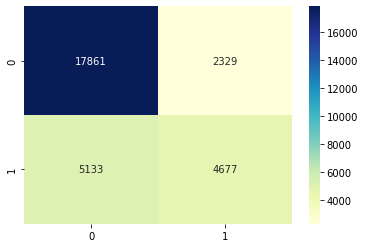

In [ ]:
get_clf_eval(y_valid, y_pred_lgbm)

In [ ]:
submit['answer'] = lgbm_clf.predict(df_test_s)

In [ ]:
len(submit['answer'])

35816

In [ ]:
len(submit[submit['answer']==1])/len(submit['answer']) *100

24.159593477775296

In [ ]:
submit.to_csv('/content/drive/MyDrive/year-dream 실습/개인 캐글 대회/data/prediction_shortcol.csv', index=False)

##Threshold 주기

In [ ]:
y_pred_prob = lgbm_clf.predict_proba(X_valid)


정확도: 0.7355
정밀도: 0.5814
재현율: 0.6825
AUC: 0.7219
F1: 0.6279


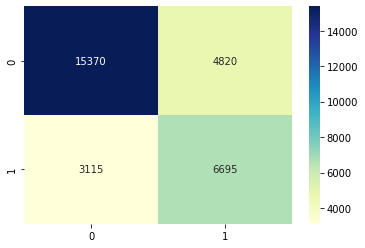

In [ ]:
get_clf_eval(y_valid,y_pred_prob[:,1]>0.34)

In [ ]:
submit['answer'] = lgbm_clf.predict_proba(df_test_s)[:,1]>0.34

In [ ]:
submit['answer']=submit['answer'].astype(int)

In [ ]:
submit.to_csv('/content/drive/MyDrive/year-dream 실습/개인 캐글 대회/data/prediction_shortcol_threshold444.csv', index=False)

lgbm 0.713

##XGBoost

In [ ]:
xgb_clf = xgboost.XGBClassifier()

param_grid = {'max_depth':[5,6,7,10],
              'n_estimator':[100,200,300]}
cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=2)
grid_search = GridSearchCV(estimator=xgb_clf,
                           param_grid=param_grid, 
                           n_jobs=-1,
                           cv=cv,
                           scoring='accuracy', 
                           error_score=0) 

results=grid_search.fit(X_train, y_train)

results.best_params_

KeyboardInterrupt: ignored

In [ ]:
xgb_clf = xgboost.XGBClassifier(max_depth = results.best_params_['max_depth'],
                                n_estimators = 1000,
                                eval_metric='mlogloss')

# xgboost를 gpu로 돌리고 싶다면 아래 코드를 수행
# xgb_clf = xgboost.XGBClassifier(max_depth = results.best_params_['max_depth'],
#                                 n_estimators = results.best_params_['n_estimators'],
#                                 eval_metric='mlogloss',
#                                 tree_method='gpu_hist',
#                                 predictor='gpu_predictor')

xgb_clf.fit(X_train, y_train, verbose=True)

y_pred_xgb = xgb_clf.predict(X_valid)


정확도: 0.7535
정밀도: 0.6644
재현율: 0.5064
AUC: 0.6905
F1: 0.5748


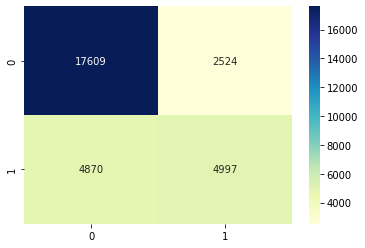

In [ ]:
get_clf_eval(y_valid,y_pred_xgb)

In [ ]:
y_pred_prob_xgb = xgb_clf.predict_proba(X_valid)


정확도: 0.7340
정밀도: 0.5737
재현율: 0.6963
AUC: 0.7242
F1: 0.6291


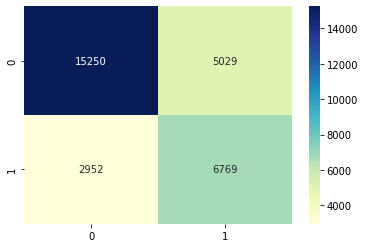

In [ ]:
get_clf_eval(y_valid,y_pred_prob_xgb[:,1]>=0.34)

In [ ]:
submit['answer'] = xgb_clf.predict_proba(df_test_s)[:,1]>=0.34

In [ ]:
submit['answer']=submit['answer'].astype(int)

In [ ]:
submit.to_csv('/content/drive/MyDrive/year-dream 실습/개인 캐글 대회/data/prediction_shortcol_xgb_threshold2.csv', index=False)

## 줄인컬럼으로 다시 EDA

In [ ]:
df_train_s

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,tax_liens,emp_length,home_ownership1,home_ownership2,home_ownership3,home_ownership4,home_ownership5,home_ownership6,verification_status1,verification_status2,verification_status3,purpose1,purpose2,purpose3,purpose4,purpose5,purpose6,purpose7,purpose8,purpose9,purpose10,purpose11,purpose12,purpose13,purpose14,initial_list_status1,initial_list_status2,mths_since_last_delinq,funded_amnt,funded_amnt_inv,total_rec_late_fee,term1,open_acc,installment,revol_util,out_prncp,out_prncp_inv,total_rec_int,fico_range_low,fico_range_high,depvar
0,0.0824,21000.0,29.19,0,1,0,3016,26,0,0,0,11773,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1200,1200.0,0.0,1,18,37.74,0.076,0.0,0.0,157.94,765,769,0
1,0.1299,80000.0,4.82,0,1,1,5722,24,0,0,0,21875,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,8000,8000.0,0.0,1,8,269.52,0.447,0.0,0.0,1702.42,665,669,0
2,0.1299,38000.0,23.66,0,3,0,6511,18,0,0,0,31868,0,0,0,4,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,11,5000,5000.0,0.0,1,7,168.45,0.880,0.0,0.0,1066.64,670,674,0
3,0.1367,100000.0,16.27,4,2,0,6849,30,0,0,0,326049,0,0,0,3,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,5,15000,15000.0,0.0,1,12,510.27,0.457,0.0,0.0,1256.24,680,684,1
4,0.1269,30000.0,25.28,0,1,2,8197,12,0,0,2506,8840,0,0,0,4,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,10000,10000.0,0.0,1,8,335.45,0.416,0.0,0.0,871.04,660,664,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.1757,65000.0,17.67,0,3,1,11255,21,1,0,0,26570,0,0,0,7,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,20000,20000.0,0.0,1,13,718.75,0.780,0.0,0.0,5373.29,660,664,1
99996,0.0890,65000.0,2.88,0,0,0,2105,12,0,0,0,6138,0,0,0,11,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,6000,6000.0,0.0,1,7,190.52,0.120,0.0,0.0,835.66,765,769,0
99997,0.1349,46000.0,32.12,0,1,0,8998,20,0,0,0,96531,0,0,0,4,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,6400,6400.0,0.0,1,19,217.16,0.643,0.0,0.0,1261.67,665,669,0
99998,0.2115,31000.0,4.53,0,1,0,3875,4,0,0,0,3875,0,0,0,12,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,5500,5500.0,0.0,1,3,207.64,0.731,0.0,0.0,1357.69,710,714,1


In [ ]:
df_train_s[['annual_inc']].describe()

,annual_inc
count,1.000000e+05
mean,7.436061e+04
std,7.467409e+04
min,5.360000e+03
25%,4.500000e+04
50%,6.200000e+04
75%,9.000000e+04
max,8.300000e+06


In [ ]:
import numpy as np

In [ ]:
df_train_s['log_annual_inc'] = df_train_s['annual_inc'].apply(lambda x: np.log10(x+1))
df_test_s['log_annual_inc'] = df_test_s['annual_inc'].apply(lambda x: np.log10(x+1))


In [ ]:
df_train_s.drop('annual_inc', axis=1,inplace=True)
df_test_s.drop('annual_inc', axis=1,inplace=True)

In [ ]:
X = df_train_s.drop('depvar', axis =1)
y = df_train_s['depvar']

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3)

In [ ]:
lgbm_clf = LGBMClassifier()
lgbm_clf.fit(X_train,y_train)
y_pred_lgbm = lgbm_clf.predict(X_valid)


정확도: 0.7523
정밀도: 0.6606
재현율: 0.4878
AUC: 0.6836
F1: 0.5612


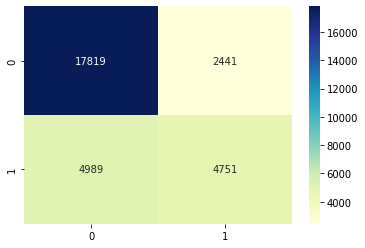

In [ ]:
get_clf_eval(y_valid, y_pred_lgbm)

In [ ]:
y_pred_prob = lgbm_clf.predict_proba(X_valid)


정확도: 0.7337
정밀도: 0.5751
재현율: 0.6880
AUC: 0.7218
F1: 0.6265


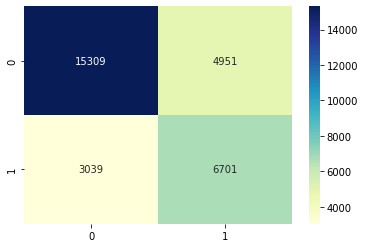

In [ ]:
get_clf_eval(y_valid,y_pred_prob[:,1]>0.34)

In [ ]:
submit['answer'] = lgbm_clf.predict_proba(df_test_s)[:,1]>0.34

In [ ]:
submit['answer']=submit['answer'].astype(int)

In [ ]:
submit.to_csv('/content/drive/MyDrive/year-dream 실습/개인 캐글 대회/data/prediction_copy.csv', index=False)

In [ ]:
gbm_clf = GradientBoostingClassifier(max_depth=5, n_estimators=150)

In [ ]:
gbm_clf.fit(X_train,y_train)
y_pred_gbm = gbm_clf.predict(X_valid)


정확도: 0.7394
정밀도: 0.6817
재현율: 0.3700
AUC: 0.6435
F1: 0.4797


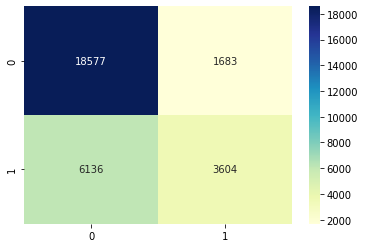

In [ ]:
get_clf_eval(y_valid, y_pred_gbm)

In [ ]:
df_train_s.columns

Index(['int_rate', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'pub_rec',
       'revol_bal', 'total_acc', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens', 'emp_length',
       'home_ownership1', 'home_ownership2', 'home_ownership3',
       'home_ownership4', 'home_ownership5', 'home_ownership6',
       'verification_status1', 'verification_status2', 'verification_status3',
       'purpose1', 'purpose2', 'purpose3', 'purpose4', 'purpose5', 'purpose6',
       'purpose7', 'purpose8', 'purpose9', 'purpose10', 'purpose11',
       'purpose12', 'purpose13', 'purpose14', 'initial_list_status1',
       'initial_list_status2', 'mths_since_last_delinq', 'funded_amnt',
       'funded_amnt_inv', 'total_rec_late_fee', 'term1', 'open_acc',
       'installment', 'revol_util', 'out_prncp', 'out_prncp_inv',
       'total_rec_int', 'fico_range_low', 'fico_range_high', 'depvar',
       'log_annual_inc'],
     

##Standard Scale 

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
df_traisn_s['annual_inc_scaled']=caler.fit(df_train_s[['annual_inc']])

In [ ]:
df_train_s['annual_inc']=scaler.fit_transform(df_train_s[['annual_inc']])
df_test_s['annual_inc']= scaler.fit_transform(df_test_s[['annual_inc']])

In [ ]:
df_train_s.drop('annual_inc_scaled',axis=1,inplace=True)

In [ ]:
df_train_s

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,tax_liens,emp_length,home_ownership1,home_ownership2,home_ownership3,home_ownership4,home_ownership5,home_ownership6,verification_status1,verification_status2,verification_status3,purpose1,purpose2,purpose3,purpose4,purpose5,purpose6,purpose7,purpose8,purpose9,purpose10,purpose11,purpose12,purpose13,purpose14,initial_list_status1,initial_list_status2,mths_since_last_delinq,funded_amnt,funded_amnt_inv,total_rec_late_fee,term1,open_acc,installment,revol_util,out_prncp,out_prncp_inv,total_rec_int,fico_range_low,fico_range_high,depvar
0,0.0824,-0.714584,29.19,0,1,0,3016,26,0,0,0,11773,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1200,1200.0,0.0,1,18,37.74,0.076,0.0,0.0,157.94,765,769,0
1,0.1299,0.075520,4.82,0,1,1,5722,24,0,0,0,21875,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,8000,8000.0,0.0,1,8,269.52,0.447,0.0,0.0,1702.42,665,669,0
2,0.1299,-0.486927,23.66,0,3,0,6511,18,0,0,0,31868,0,0,0,4,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,11,5000,5000.0,0.0,1,7,168.45,0.880,0.0,0.0,1066.64,670,674,0
3,0.1367,0.343352,16.27,4,2,0,6849,30,0,0,0,326049,0,0,0,3,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,5,15000,15000.0,0.0,1,12,510.27,0.457,0.0,0.0,1256.24,680,684,1
4,0.1269,-0.594059,25.28,0,1,2,8197,12,0,0,2506,8840,0,0,0,4,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,10000,10000.0,0.0,1,8,335.45,0.416,0.0,0.0,871.04,660,664,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.1757,-0.125353,17.67,0,3,1,11255,21,1,0,0,26570,0,0,0,7,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,20000,20000.0,0.0,1,13,718.75,0.780,0.0,0.0,5373.29,660,664,1
99996,0.0890,-0.125353,2.88,0,0,0,2105,12,0,0,0,6138,0,0,0,11,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,6000,6000.0,0.0,1,7,190.52,0.120,0.0,0.0,835.66,765,769,0
99997,0.1349,-0.379794,32.12,0,1,0,8998,20,0,0,0,96531,0,0,0,4,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,6400,6400.0,0.0,1,19,217.16,0.643,0.0,0.0,1261.67,665,669,0
99998,0.2115,-0.580668,4.53,0,1,0,3875,4,0,0,0,3875,0,0,0,12,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,5500,5500.0,0.0,1,3,207.64,0.731,0.0,0.0,1357.69,710,714,1


In [ ]:
df_test_s

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,tax_liens,emp_length,home_ownership1,home_ownership2,home_ownership3,home_ownership4,home_ownership5,home_ownership6,verification_status1,verification_status2,verification_status3,purpose1,purpose2,purpose3,purpose4,purpose5,purpose6,purpose7,purpose8,purpose9,purpose10,purpose11,purpose12,purpose13,purpose14,initial_list_status1,initial_list_status2,mths_since_last_delinq,funded_amnt,funded_amnt_inv,total_rec_late_fee,term1,open_acc,installment,revol_util,out_prncp,out_prncp_inv,total_rec_int,fico_range_low,fico_range_high
0,0.1449,-0.675360,26.08,0,0,1,3486,10,0,0,0,9214,0,0,0,7,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,8100,8100.0,0.00,1,4,278.78,0.311,0.0,0.0,460.40,700,704
1,0.1899,-0.107799,13.97,0,0,0,25305,20,0,0,0,115612,0,0,0,2,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,7,20000,20000.0,0.00,0,10,518.71,0.885,0.0,0.0,4866.68,675,679
2,0.1049,-0.247880,23.28,0,0,0,10910,21,0,0,0,33017,0,0,0,11,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,7,10000,10000.0,16.25,1,7,324.98,0.580,0.0,0.0,1451.06,675,679
3,0.1757,-0.028420,30.32,0,0,0,42423,26,0,0,0,152515,0,0,0,2,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,27200,27200.0,0.00,0,16,684.36,0.701,0.0,0.0,7068.11,665,669
4,0.2020,-0.282900,25.61,0,2,0,21703,24,0,0,0,135282,0,0,0,2,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,22000,22000.0,0.00,0,13,585.32,0.622,0.0,0.0,7754.20,710,714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35811,0.1049,0.417504,9.02,0,0,1,8991,33,0,0,0,17468,0,0,0,2,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,12000,12000.0,0.00,1,13,389.98,0.346,0.0,0.0,1406.13,665,669
35812,0.0824,-0.341267,32.56,1,0,0,20966,29,0,0,0,24802,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,5000,5000.0,0.00,1,9,157.24,0.690,0.0,0.0,495.70,705,709
35813,0.1368,-0.294573,17.60,0,0,0,5597,7,0,0,0,20691,0,0,0,3,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,6000,6000.0,0.00,1,7,204.14,0.333,0.0,0.0,1355.06,705,709
35814,0.1139,0.123942,9.96,0,0,1,7184,13,0,0,0,31396,0,0,0,3,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,10000,10000.0,0.00,1,8,329.24,0.352,0.0,0.0,1615.15,725,729



정확도: 0.6159
정밀도: 0.3238
재현율: 0.1772
AUC: 0.5007
F1: 0.2291


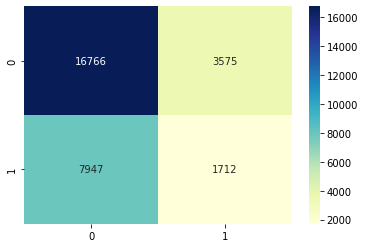

In [ ]:
X = df_train_s.drop('depvar', axis =1)
y = df_train_s['depvar']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3)
lgbm_clf.fit(X_train,y_train)
y_pred_lgbm = lgbm_clf.predict(X_valid)
get_clf_eval(y_valid, y_pred_gbm) #이건아닌듯 

###다시

In [ ]:
df_train_s = pd.read_csv('/content/drive/MyDrive/year-dream 실습/개인 캐글 대회/data/df_less_col_train.csv')
df_test_s = pd.read_csv('/content/drive/MyDrive/year-dream 실습/개인 캐글 대회/data/df_less_col_test.csv')
submit = pd.read_csv('/content/drive/MyDrive/year-dream 실습/개인 캐글 대회/data/sample_submission.csv')

In [ ]:
df_train_s.columns

Index(['int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'pub_rec', 'revol_bal', 'total_acc', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens', 'emp_length',
       'home_ownership1', 'home_ownership2', 'home_ownership3',
       'home_ownership4', 'home_ownership5', 'home_ownership6',
       'verification_status1', 'verification_status2', 'verification_status3',
       'purpose1', 'purpose2', 'purpose3', 'purpose4', 'purpose5', 'purpose6',
       'purpose7', 'purpose8', 'purpose9', 'purpose10', 'purpose11',
       'purpose12', 'purpose13', 'purpose14', 'initial_list_status1',
       'initial_list_status2', 'mths_since_last_delinq', 'funded_amnt',
       'funded_amnt_inv', 'total_rec_late_fee', 'term1', 'open_acc',
       'installment', 'revol_util', 'out_prncp', 'out_prncp_inv',
       'total_rec_int', 'fico_range_low', 'fico_range_high', 'depvar'],
      dtype='obj

In [ ]:
df_train_s[['home_ownership6']].value_counts()

home_ownership6
0                  57745
1                  42255
dtype: int64

In [ ]:
df_train_s

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,tax_liens,emp_length,home_ownership1,home_ownership2,home_ownership3,home_ownership4,home_ownership5,home_ownership6,verification_status1,verification_status2,verification_status3,purpose1,purpose2,purpose3,purpose4,purpose5,purpose6,purpose7,purpose8,purpose9,purpose10,purpose11,purpose12,purpose13,purpose14,initial_list_status1,initial_list_status2,mths_since_last_delinq,funded_amnt,funded_amnt_inv,total_rec_late_fee,term1,open_acc,installment,revol_util,out_prncp,out_prncp_inv,total_rec_int,fico_range_low,fico_range_high,depvar
0,0.0824,21000.0,29.19,0,1,0,3016,26,0,0,0,11773,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1200,1200.0,0.0,1,18,37.74,0.076,0.0,0.0,157.94,765,769,0
1,0.1299,80000.0,4.82,0,1,1,5722,24,0,0,0,21875,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,8000,8000.0,0.0,1,8,269.52,0.447,0.0,0.0,1702.42,665,669,0
2,0.1299,38000.0,23.66,0,3,0,6511,18,0,0,0,31868,0,0,0,4,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,11,5000,5000.0,0.0,1,7,168.45,0.880,0.0,0.0,1066.64,670,674,0
3,0.1367,100000.0,16.27,4,2,0,6849,30,0,0,0,326049,0,0,0,3,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,5,15000,15000.0,0.0,1,12,510.27,0.457,0.0,0.0,1256.24,680,684,1
4,0.1269,30000.0,25.28,0,1,2,8197,12,0,0,2506,8840,0,0,0,4,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,10000,10000.0,0.0,1,8,335.45,0.416,0.0,0.0,871.04,660,664,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.1757,65000.0,17.67,0,3,1,11255,21,1,0,0,26570,0,0,0,7,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,20000,20000.0,0.0,1,13,718.75,0.780,0.0,0.0,5373.29,660,664,1
99996,0.0890,65000.0,2.88,0,0,0,2105,12,0,0,0,6138,0,0,0,11,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,6000,6000.0,0.0,1,7,190.52,0.120,0.0,0.0,835.66,765,769,0
99997,0.1349,46000.0,32.12,0,1,0,8998,20,0,0,0,96531,0,0,0,4,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,6400,6400.0,0.0,1,19,217.16,0.643,0.0,0.0,1261.67,665,669,0
99998,0.2115,31000.0,4.53,0,1,0,3875,4,0,0,0,3875,0,0,0,12,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,5500,5500.0,0.0,1,3,207.64,0.731,0.0,0.0,1357.69,710,714,1


In [55]:
df_train_s['fico_score'] = 0.5*df_train_s['fico_range_low'] + 0.5*df_train_s['fico_range_high']
df_test_s['fico_score'] = 0.5*df_test_s['fico_range_low'] + 0.5*df_test_s['fico_range_high']

In [56]:
df_train_s.drop(['fico_range_low','fico_range_high'],axis=1,inplace=True)
df_test_s.drop(['fico_range_low','fico_range_high'],axis=1,inplace=True)

In [ ]:
df_train_s.drop('purpose4',axis=1,inplace=True)
df_test_s.drop('purpose4',axis=1,inplace=True)

In [ ]:
df_train_s

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,tax_liens,emp_length,home_ownership1,home_ownership2,home_ownership3,home_ownership4,home_ownership5,home_ownership6,verification_status1,verification_status2,verification_status3,purpose1,purpose2,purpose3,purpose5,purpose6,purpose7,purpose8,purpose9,purpose10,purpose11,purpose12,purpose13,purpose14,initial_list_status1,initial_list_status2,mths_since_last_delinq,funded_amnt,funded_amnt_inv,total_rec_late_fee,term1,open_acc,installment,revol_util,out_prncp,out_prncp_inv,total_rec_int,depvar,fico_score
0,0.0824,21000.0,29.19,0,1,0,3016,26,0,0,0,11773,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1200,1200.0,0.0,1,18,37.74,0.076,0.0,0.0,157.94,0,767.0
1,0.1299,80000.0,4.82,0,1,1,5722,24,0,0,0,21875,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,8000,8000.0,0.0,1,8,269.52,0.447,0.0,0.0,1702.42,0,667.0
2,0.1299,38000.0,23.66,0,3,0,6511,18,0,0,0,31868,0,0,0,4,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,11,5000,5000.0,0.0,1,7,168.45,0.880,0.0,0.0,1066.64,0,672.0
3,0.1367,100000.0,16.27,4,2,0,6849,30,0,0,0,326049,0,0,0,3,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,5,15000,15000.0,0.0,1,12,510.27,0.457,0.0,0.0,1256.24,1,682.0
4,0.1269,30000.0,25.28,0,1,2,8197,12,0,0,2506,8840,0,0,0,4,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,10000,10000.0,0.0,1,8,335.45,0.416,0.0,0.0,871.04,1,662.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.1757,65000.0,17.67,0,3,1,11255,21,1,0,0,26570,0,0,0,7,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,20000,20000.0,0.0,1,13,718.75,0.780,0.0,0.0,5373.29,1,662.0
99996,0.0890,65000.0,2.88,0,0,0,2105,12,0,0,0,6138,0,0,0,11,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,6000,6000.0,0.0,1,7,190.52,0.120,0.0,0.0,835.66,0,767.0
99997,0.1349,46000.0,32.12,0,1,0,8998,20,0,0,0,96531,0,0,0,4,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,6400,6400.0,0.0,1,19,217.16,0.643,0.0,0.0,1261.67,0,667.0
99998,0.2115,31000.0,4.53,0,1,0,3875,4,0,0,0,3875,0,0,0,12,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,5500,5500.0,0.0,1,3,207.64,0.731,0.0,0.0,1357.69,1,712.0


In [16]:
corr_depvar=abs(df_train_s.corr()['depvar'])

In [17]:
drop_corr=list(corr_depvar[corr_depvar<0.01].index)

In [18]:
drop_corr

['total_acc',
 'acc_now_delinq',
 'tot_coll_amt',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens',
 'home_ownership1',
 'home_ownership3',
 'home_ownership4',
 'home_ownership5',
 'purpose1',
 'purpose6',
 'purpose7',
 'purpose8',
 'purpose9',
 'purpose10',
 'purpose11',
 'purpose13',
 'purpose14']

In [19]:
df_train_s.drop(labels=drop_corr,axis=1,inplace=True)
df_test_s.drop(labels=drop_corr,axis=1,inplace=True)

In [ ]:
df_train_s

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,collections_12_mths_ex_med,tot_cur_bal,emp_length,home_ownership2,home_ownership6,verification_status1,verification_status2,verification_status3,purpose2,purpose3,purpose5,purpose12,initial_list_status1,initial_list_status2,mths_since_last_delinq,funded_amnt,funded_amnt_inv,total_rec_late_fee,term1,open_acc,installment,revol_util,out_prncp,out_prncp_inv,total_rec_int,depvar,fico_score
0,0.0824,21000.0,29.19,0,1,0,3016,0,11773,1,0,1,0,1,0,1,0,0,0,0,1,1,1200,1200.0,0.0,1,18,37.74,0.076,0.0,0.0,157.94,0,767.0
1,0.1299,80000.0,4.82,0,1,1,5722,0,21875,2,0,1,0,0,1,0,1,0,0,0,1,1,8000,8000.0,0.0,1,8,269.52,0.447,0.0,0.0,1702.42,0,667.0
2,0.1299,38000.0,23.66,0,3,0,6511,0,31868,4,0,1,0,1,0,0,1,0,0,0,1,11,5000,5000.0,0.0,1,7,168.45,0.880,0.0,0.0,1066.64,0,672.0
3,0.1367,100000.0,16.27,4,2,0,6849,0,326049,3,1,0,0,0,1,0,1,0,0,0,1,5,15000,15000.0,0.0,1,12,510.27,0.457,0.0,0.0,1256.24,1,682.0
4,0.1269,30000.0,25.28,0,1,2,8197,0,8840,4,0,1,0,1,0,0,1,0,0,0,1,1,10000,10000.0,0.0,1,8,335.45,0.416,0.0,0.0,871.04,1,662.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.1757,65000.0,17.67,0,3,1,11255,1,26570,7,0,1,0,0,1,0,1,0,0,0,1,1,20000,20000.0,0.0,1,13,718.75,0.780,0.0,0.0,5373.29,1,662.0
99996,0.0890,65000.0,2.88,0,0,0,2105,0,6138,11,0,1,0,1,0,0,1,0,0,1,0,1,6000,6000.0,0.0,1,7,190.52,0.120,0.0,0.0,835.66,0,767.0
99997,0.1349,46000.0,32.12,0,1,0,8998,0,96531,4,0,1,1,0,0,1,0,0,0,0,1,1,6400,6400.0,0.0,1,19,217.16,0.643,0.0,0.0,1261.67,0,667.0
99998,0.2115,31000.0,4.53,0,1,0,3875,0,3875,12,0,1,0,0,1,0,0,0,0,0,1,1,5500,5500.0,0.0,1,3,207.64,0.731,0.0,0.0,1357.69,1,712.0



정확도: 0.7533
정밀도: 0.6685
재현율: 0.4884
AUC: 0.6853
F1: 0.5644


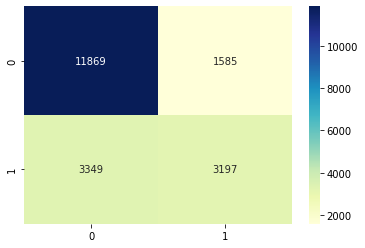

In [ ]:
X = df_train_s.drop('depvar', axis =1)
y = df_train_s['depvar']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)
lgbm_clf.fit(X_train,y_train)
y_pred_lgbm = lgbm_clf.predict(X_valid)
get_clf_eval(y_valid, y_pred_lgbm) 


정확도: 0.7533
정밀도: 0.6685
재현율: 0.4884
AUC: 0.6853
F1: 0.5644


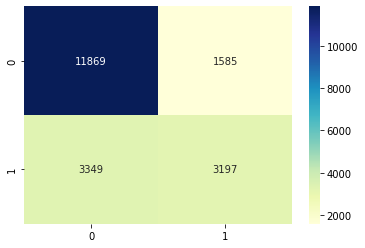

In [ ]:
#threshold
y_pred_prob = lgbm_clf.predict_proba(X_valid)
get_clf_eval(y_valid,y_pred_prob[:,1]>0.5)

In [ ]:
submit['answer'] = lgbm_clf.predict_proba(df_test_s)[:,1]>0.5
submit['answer']=submit['answer'].astype(int)

In [ ]:
submit

,ID,answer
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1
...,...,...
35811,35811,0
35812,35812,0
35813,35813,0
35814,35814,0


In [ ]:
submit.to_csv('/content/drive/MyDrive/year-dream 실습/개인 캐글 대회/data/prediction_feature_0.28.csv', index=False)

##mths, emp_lengh삭제

In [ ]:
df_train_s.groupby('emp_length')['depvar'].value_counts(normalize=True)[:,1]

emp_length
1     0.336850
2     0.304837
3     0.320210
4     0.322661
5     0.323302
6     0.320376
7     0.316038
8     0.329435
9     0.332896
10    0.324605
11    0.333951
12    0.425689
Name: depvar, dtype: float64

In [ ]:
df_train_s.groupby('mths_since_last_delinq')['depvar'].value_counts(normalize=True)

mths_since_last_delinq  depvar
1                       0         0.682886
                        1         0.317114
2                       0         0.662720
                        1         0.337280
3                       0         0.658512
                        1         0.341488
4                       0         0.646389
                        1         0.353611
5                       0         0.667783
                        1         0.332217
6                       0         0.664127
                        1         0.335873
7                       0         0.681924
                        1         0.318076
8                       0         0.678458
                        1         0.321542
9                       0         0.665645
                        1         0.334355
10                      0         0.663602
                        1         0.336398
11                      0         0.670441
                        1         0.329559
Name: depvar, dtype: fl

In [57]:
df_train_s.drop(['mths_since_last_delinq'],axis=1,inplace=True)
df_test_s.drop(['mths_since_last_delinq'],axis=1,inplace=True)

In [ ]:
df_train_s.columns

Index(['int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'pub_rec', 'revol_bal', 'collections_12_mths_ex_med', 'tot_cur_bal',
       'home_ownership2', 'home_ownership6', 'verification_status1',
       'verification_status2', 'verification_status3', 'purpose2', 'purpose3',
       'purpose5', 'purpose12', 'initial_list_status1', 'initial_list_status2',
       'funded_amnt', 'funded_amnt_inv', 'total_rec_late_fee', 'term1',
       'open_acc', 'installment', 'revol_util', 'out_prncp', 'out_prncp_inv',
       'total_rec_int', 'depvar', 'fico_score'],
      dtype='object')


정확도: 0.7569
정밀도: 0.6763
재현율: 0.4848
AUC: 0.6864
F1: 0.5648


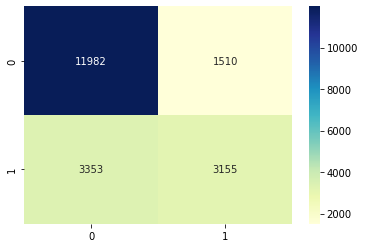

In [21]:
X = df_train_s.drop('depvar', axis =1)
y = df_train_s['depvar']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)
lgbm_clf.fit(X_train,y_train)
y_pred_lgbm = lgbm_clf.predict(X_valid)
get_clf_eval(y_valid, y_pred_lgbm) 


정확도: 0.7288
정밀도: 0.5624
재현율: 0.7511
AUC: 0.7346
F1: 0.6432


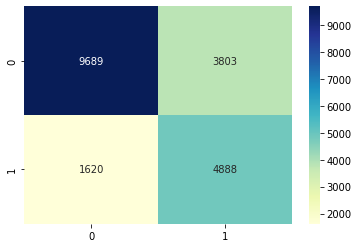

In [24]:
y_pred_prob = lgbm_clf.predict_proba(X_valid)
get_clf_eval(y_valid,y_pred_prob[:,1]>0.3)

In [25]:
submit['answer'] = lgbm_clf.predict_proba(df_test_s)[:,1]>0.3
submit['answer']=submit['answer'].astype(int)

In [26]:
submit.to_csv('/content/drive/MyDrive/year-dream 실습/개인 캐글 대회/data/prediction_random.csv', index=False)

##feature 줄이기 다시

In [27]:
df_train_s = pd.read_csv('/content/drive/MyDrive/year-dream 실습/개인 캐글 대회/data/df_less_col_train.csv')
df_test_s = pd.read_csv('/content/drive/MyDrive/year-dream 실습/개인 캐글 대회/data/df_less_col_test.csv')
submit = pd.read_csv('/content/drive/MyDrive/year-dream 실습/개인 캐글 대회/data/sample_submission.csv')

In [ ]:
df_train_s.columns

Index(['int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'pub_rec', 'revol_bal', 'total_acc', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens', 'emp_length',
       'home_ownership1', 'home_ownership2', 'home_ownership3',
       'home_ownership4', 'home_ownership5', 'home_ownership6',
       'verification_status1', 'verification_status2', 'verification_status3',
       'purpose1', 'purpose2', 'purpose3', 'purpose4', 'purpose5', 'purpose6',
       'purpose7', 'purpose8', 'purpose9', 'purpose10', 'purpose11',
       'purpose12', 'purpose13', 'purpose14', 'initial_list_status1',
       'initial_list_status2', 'mths_since_last_delinq', 'funded_amnt',
       'funded_amnt_inv', 'total_rec_late_fee', 'term1', 'open_acc',
       'installment', 'revol_util', 'out_prncp', 'out_prncp_inv',
       'total_rec_int', 'fico_range_low', 'fico_range_high', 'depvar'],
      dtype='obj

In [ ]:
df_train_s

,int_rate,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,tax_liens,emp_length,home_ownership1,home_ownership2,home_ownership3,home_ownership4,home_ownership5,home_ownership6,verification_status1,verification_status2,verification_status3,purpose1,purpose2,purpose3,purpose5,purpose6,purpose7,purpose8,purpose9,purpose10,purpose11,purpose12,purpose13,purpose14,initial_list_status1,initial_list_status2,mths_since_last_delinq,funded_amnt,funded_amnt_inv,total_rec_late_fee,term1,open_acc,installment,revol_util,out_prncp,out_prncp_inv,total_rec_int,depvar,log_annual_inc,fico_score
0,0.0824,29.19,0,1,0,3016,26,0,0,0,11773,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1200,1200.0,0.0,1,18,37.74,0.076,0.0,0.0,157.94,0,4.322240,767.0
1,0.1299,4.82,0,1,1,5722,24,0,0,0,21875,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,8000,8000.0,0.0,1,8,269.52,0.447,0.0,0.0,1702.42,0,4.903095,667.0
2,0.1299,23.66,0,3,0,6511,18,0,0,0,31868,0,0,0,4,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,11,5000,5000.0,0.0,1,7,168.45,0.880,0.0,0.0,1066.64,0,4.579795,672.0
3,0.1367,16.27,4,2,0,6849,30,0,0,0,326049,0,0,0,3,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,5,15000,15000.0,0.0,1,12,510.27,0.457,0.0,0.0,1256.24,1,5.000004,682.0
4,0.1269,25.28,0,1,2,8197,12,0,0,2506,8840,0,0,0,4,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,10000,10000.0,0.0,1,8,335.45,0.416,0.0,0.0,871.04,1,4.477136,662.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.1757,17.67,0,3,1,11255,21,1,0,0,26570,0,0,0,7,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,20000,20000.0,0.0,1,13,718.75,0.780,0.0,0.0,5373.29,1,4.812920,662.0
99996,0.0890,2.88,0,0,0,2105,12,0,0,0,6138,0,0,0,11,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,6000,6000.0,0.0,1,7,190.52,0.120,0.0,0.0,835.66,0,4.812920,767.0
99997,0.1349,32.12,0,1,0,8998,20,0,0,0,96531,0,0,0,4,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,6400,6400.0,0.0,1,19,217.16,0.643,0.0,0.0,1261.67,0,4.662767,667.0
99998,0.2115,4.53,0,1,0,3875,4,0,0,0,3875,0,0,0,12,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,5500,5500.0,0.0,1,3,207.64,0.731,0.0,0.0,1357.69,1,4.491376,712.0


In [28]:
df_train_s.drop('purpose4',axis=1,inplace=True)
df_test_s.drop('purpose4',axis=1,inplace=True)

In [ ]:
len(df_train_s.columns)

54

In [59]:
lgbm_clf = LGBMClassifier(objective='binary',learning_rate=0.01,n_estimators=1500,random_state=127)


정확도: 0.7533
정밀도: 0.6751
재현율: 0.4701
AUC: 0.6803
F1: 0.5543


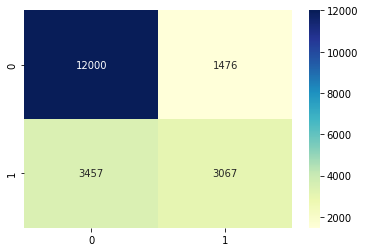

In [12]:
X = df_train_s.drop('depvar', axis =1)
y = df_train_s['depvar']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)
lgbm_clf.fit(X_train,y_train)
y_pred_lgbm = lgbm_clf.predict(X_valid)
get_clf_eval(y_valid, y_pred_lgbm) 


정확도: 0.7391
정밀도: 0.5852
재현율: 0.6879
AUC: 0.7259
F1: 0.6324


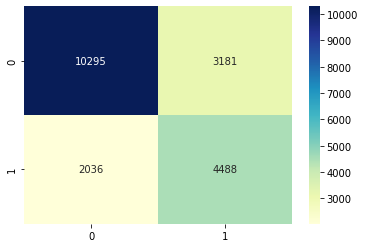

In [13]:
y_pred_prob = lgbm_clf.predict_proba(X_valid)
get_clf_eval(y_valid,y_pred_prob[:,1]>0.34)

In [14]:
submit['answer'] = lgbm_clf.predict_proba(df_test_s)[:,1]>0.34
submit['answer']=submit['answer'].astype(int)

In [ ]:
submit

,ID,answer
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1
...,...,...
35811,35811,0
35812,35812,0
35813,35813,0
35814,35814,0


In [15]:
submit.to_csv('/content/drive/MyDrive/year-dream 실습/개인 캐글 대회/data/prediction_716-1.csv', index=False)

In [ ]:
df_train_s.columns

Index(['int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'pub_rec', 'revol_bal', 'total_acc', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens', 'emp_length',
       'home_ownership1', 'home_ownership2', 'home_ownership3',
       'home_ownership4', 'home_ownership5', 'home_ownership6',
       'verification_status1', 'verification_status2', 'verification_status3',
       'purpose1', 'purpose2', 'purpose3', 'purpose5', 'purpose6', 'purpose7',
       'purpose8', 'purpose9', 'purpose10', 'purpose11', 'purpose12',
       'purpose13', 'purpose14', 'initial_list_status1',
       'initial_list_status2', 'mths_since_last_delinq', 'funded_amnt',
       'funded_amnt_inv', 'total_rec_late_fee', 'term1', 'open_acc',
       'installment', 'revol_util', 'out_prncp', 'out_prncp_inv',
       'total_rec_int', 'fico_range_low', 'fico_range_high', 'depvar'],
      dtype='object')

In [29]:
df_train_s['home_ownership'] = 0
df_train_s['purpose'] = 0
# df_train_s['verification_status']= 0


In [ ]:
df_train_s

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,tax_liens,emp_length,home_ownership1,home_ownership2,home_ownership3,home_ownership4,home_ownership5,home_ownership6,verification_status1,verification_status2,verification_status3,purpose1,purpose2,purpose3,purpose5,purpose6,purpose7,purpose8,purpose9,purpose10,purpose11,purpose12,purpose13,purpose14,initial_list_status1,initial_list_status2,mths_since_last_delinq,funded_amnt,funded_amnt_inv,total_rec_late_fee,term1,open_acc,installment,revol_util,out_prncp,out_prncp_inv,total_rec_int,fico_range_low,fico_range_high,depvar,home_ownership,purpose,verification_status
0,0.0824,21000.0,29.19,0,1,0,3016,26,0,0,0,11773,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1200,1200.0,0.0,1,18,37.74,0.076,0.0,0.0,157.94,765,769,0,0,0,0
1,0.1299,80000.0,4.82,0,1,1,5722,24,0,0,0,21875,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,8000,8000.0,0.0,1,8,269.52,0.447,0.0,0.0,1702.42,665,669,0,0,0,0
2,0.1299,38000.0,23.66,0,3,0,6511,18,0,0,0,31868,0,0,0,4,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,11,5000,5000.0,0.0,1,7,168.45,0.880,0.0,0.0,1066.64,670,674,0,0,0,0
3,0.1367,100000.0,16.27,4,2,0,6849,30,0,0,0,326049,0,0,0,3,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,5,15000,15000.0,0.0,1,12,510.27,0.457,0.0,0.0,1256.24,680,684,1,0,0,0
4,0.1269,30000.0,25.28,0,1,2,8197,12,0,0,2506,8840,0,0,0,4,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,10000,10000.0,0.0,1,8,335.45,0.416,0.0,0.0,871.04,660,664,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.1757,65000.0,17.67,0,3,1,11255,21,1,0,0,26570,0,0,0,7,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,20000,20000.0,0.0,1,13,718.75,0.780,0.0,0.0,5373.29,660,664,1,0,0,0
99996,0.0890,65000.0,2.88,0,0,0,2105,12,0,0,0,6138,0,0,0,11,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,6000,6000.0,0.0,1,7,190.52,0.120,0.0,0.0,835.66,765,769,0,0,0,0
99997,0.1349,46000.0,32.12,0,1,0,8998,20,0,0,0,96531,0,0,0,4,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,6400,6400.0,0.0,1,19,217.16,0.643,0.0,0.0,1261.67,665,669,0,0,0,0
99998,0.2115,31000.0,4.53,0,1,0,3875,4,0,0,0,3875,0,0,0,12,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,5500,5500.0,0.0,1,3,207.64,0.731,0.0,0.0,1357.69,710,714,1,0,0,0


In [30]:
from tqdm import tqdm 

In [31]:
for i in tqdm(range(len(df_train_s))):
    if df_train_s['home_ownership1'][i] == 1:
        df_train_s['home_ownership'][i]= 1
    elif df_train_s['home_ownership2'][i] == 1:
        df_train_s['home_ownership'][i]= 2
    elif df_train_s['home_ownership3'][i] == 1:
        df_train_s['home_ownership'][i]= 3
    elif df_train_s['home_ownership4'][i] == 1:
        df_train_s['home_ownership'][i]= 4
    elif df_train_s['home_ownership5'][i] == 1:
        df_train_s['home_ownership'][i]= 5
    elif df_train_s['home_ownership6'][i] == 1:
        df_train_s['home_ownership'][i]= 6

100%|██████████| 100000/100000 [00:50<00:00, 1986.25it/s]


In [ ]:
for i in tqdm(range(len(df_train_s))):
    if df_train_s['verification_status1'][i] == 1:
        df_train_s['verification_status'][i]= 1
    elif df_train_s['verification_status2'][i] == 1:
        df_train_s['verification_status'][i]= 2
    elif df_train_s['verification_status3'][i] == 1:
        df_train_s['verification_status'][i]= 3

100%|██████████| 100000/100000 [00:37<00:00, 2645.21it/s]


In [32]:
for i in tqdm(range(len(df_train_s))):
    if df_train_s['purpose1'][i] == 1:
        df_train_s['purpose'][i]= 1
    elif df_train_s['purpose2'][i] == 1:
        df_train_s['purpose'][i]= 2
    elif df_train_s['purpose3'][i] == 1:
        df_train_s['purpose'][i]= 3
    elif df_train_s['purpose5'][i] == 1:
        df_train_s['purpose'][i]= 5
    elif df_train_s['purpose6'][i] == 1:
        df_train_s['purpose'][i]= 6
    elif df_train_s['purpose7'][i] == 1:
        df_train_s['purpose'][i]= 7
    elif df_train_s['purpose8'][i] == 1:
        df_train_s['purpose'][i]= 8
    elif df_train_s['purpose9'][i] == 1:
        df_train_s['purpose'][i]= 9
    elif df_train_s['purpose10'][i] == 1:
        df_train_s['purpose'][i]= 10
    elif df_train_s['purpose11'][i] == 1:
        df_train_s['purpose'][i]= 11
    elif df_train_s['purpose12'][i] == 1:
        df_train_s['purpose'][i]= 12
    elif df_train_s['purpose13'][i] == 1:
        df_train_s['purpose'][i]= 13
    elif df_train_s['purpose14'][i] == 1:
        df_train_s['purpose'][i]= 14

100%|██████████| 100000/100000 [00:48<00:00, 2062.68it/s]


In [33]:
df_train_s.drop(labels=['home_ownership1', 'home_ownership2', 'home_ownership3',
       'home_ownership4', 'home_ownership5', 'home_ownership6',
    #    'verification_status1', 'verification_status2', 'verification_status3',
       'purpose1', 'purpose2', 'purpose3', 'purpose5', 'purpose6', 'purpose7',
       'purpose8', 'purpose9', 'purpose10', 'purpose11', 'purpose12',
       'purpose13', 'purpose14'],axis=1,inplace=True)

In [34]:
len(df_train_s.columns)

37

In [35]:
df_test_s['home_ownership'] = 0
df_test_s['purpose'] = 0
# df_test_s['verification_status']= 0

In [36]:
for i in tqdm(range(len(df_test_s))):
    if df_test_s['home_ownership1'][i] == 1:
        df_test_s['home_ownership'][i]= 1
    elif df_test_s['home_ownership2'][i] == 1:
        df_test_s['home_ownership'][i]= 2
    elif df_test_s['home_ownership3'][i] == 1:
        df_test_s['home_ownership'][i]= 3
    elif df_test_s['home_ownership4'][i] == 1:
        df_test_s['home_ownership'][i]= 4
    elif df_test_s['home_ownership5'][i] == 1:
        df_test_s['home_ownership'][i]= 5
    elif df_test_s['home_ownership6'][i] == 1:
        df_test_s['home_ownership'][i]= 6

100%|██████████| 35816/35816 [00:22<00:00, 1577.48it/s]


In [ ]:
for i in tqdm(range(len(df_test_s))):
    if df_test_s['verification_status1'][i] == 1:
        df_test_s['verification_status'][i]= 1
    elif df_test_s['verification_status2'][i] == 1:
        df_test_s['verification_status'][i]= 2
    elif df_test_s['verification_status3'][i] == 1:
        df_test_s['verification_status'][i]= 3

100%|██████████| 35816/35816 [00:16<00:00, 2147.23it/s]


In [37]:
for i in tqdm(range(len(df_test_s))):
    if df_test_s['purpose1'][i] == 1:
        df_test_s['purpose'][i]= 1
    elif df_test_s['purpose2'][i] == 1:
        df_test_s['purpose'][i]= 2
    elif df_test_s['purpose3'][i] == 1:
        df_test_s['purpose'][i]= 3
    elif df_test_s['purpose5'][i] == 1:
        df_test_s['purpose'][i]= 5
    elif df_test_s['purpose6'][i] == 1:
        df_test_s['purpose'][i]= 6
    elif df_test_s['purpose7'][i] == 1:
        df_test_s['purpose'][i]= 7
    elif df_test_s['purpose8'][i] == 1:
        df_test_s['purpose'][i]= 8
    elif df_test_s['purpose9'][i] == 1:
        df_test_s['purpose'][i]= 9
    elif df_test_s['purpose10'][i] == 1:
        df_test_s['purpose'][i]= 10
    elif df_test_s['purpose11'][i] == 1:
        df_test_s['purpose'][i]= 11
    elif df_test_s['purpose12'][i] == 1:
        df_test_s['purpose'][i]= 12
    elif df_test_s['purpose13'][i] == 1:
        df_test_s['purpose'][i]= 13
    elif df_test_s['purpose14'][i] == 1:
        df_test_s['purpose'][i]= 14

100%|██████████| 35816/35816 [00:17<00:00, 2028.14it/s]


In [38]:
df_test_s.drop(labels=['home_ownership1', 'home_ownership2', 'home_ownership3',
       'home_ownership4', 'home_ownership5', 'home_ownership6',
    #    'verification_status1', 'verification_status2', 'verification_status3',
       'purpose1', 'purpose2', 'purpose3', 'purpose5', 'purpose6', 'purpose7',
       'purpose8', 'purpose9', 'purpose10', 'purpose11', 'purpose12',
       'purpose13', 'purpose14'],axis=1,inplace=True)


정확도: 0.7555
정밀도: 0.6734
재현율: 0.4895
AUC: 0.6871
F1: 0.5669


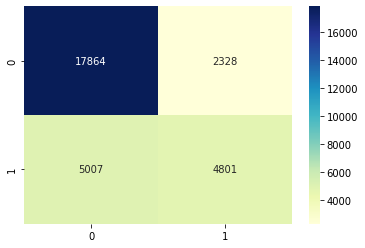

In [60]:
X = df_train_s.drop('depvar', axis =1)
y = df_train_s['depvar']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3)
lgbm_clf.fit(X_train,y_train)
y_pred_lgbm = lgbm_clf.predict(X_valid)
get_clf_eval(y_valid, y_pred_lgbm) 


정확도: 0.7349
정밀도: 0.5772
재현율: 0.7072
AUC: 0.7278
F1: 0.6356


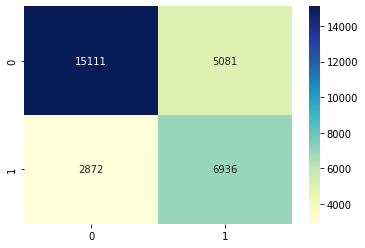

In [61]:
y_pred_prob = lgbm_clf.predict_proba(X_valid)
get_clf_eval(y_valid,y_pred_prob[:,1]>0.33)

In [62]:
submit['answer'] = lgbm_clf.predict_proba(df_test_s)[:,1]>0.33
submit['answer']=submit['answer'].astype(int)

In [58]:
df_train_s

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,tax_liens,emp_length,verification_status1,verification_status2,verification_status3,initial_list_status1,initial_list_status2,funded_amnt,funded_amnt_inv,total_rec_late_fee,term1,open_acc,installment,revol_util,out_prncp,out_prncp_inv,total_rec_int,depvar,home_ownership,purpose,fico_score
0,0.0824,21000.0,29.19,0,1,0,3016,26,0,0,0,11773,0,0,0,1,0,1,0,0,1,1200,1200.0,0.0,1,18,37.74,0.076,0.0,0.0,157.94,0,6,2,767.0
1,0.1299,80000.0,4.82,0,1,1,5722,24,0,0,0,21875,0,0,0,2,0,0,1,0,1,8000,8000.0,0.0,1,8,269.52,0.447,0.0,0.0,1702.42,0,6,3,667.0
2,0.1299,38000.0,23.66,0,3,0,6511,18,0,0,0,31868,0,0,0,4,0,1,0,0,1,5000,5000.0,0.0,1,7,168.45,0.880,0.0,0.0,1066.64,0,6,3,672.0
3,0.1367,100000.0,16.27,4,2,0,6849,30,0,0,0,326049,0,0,0,3,0,0,1,0,1,15000,15000.0,0.0,1,12,510.27,0.457,0.0,0.0,1256.24,1,2,3,682.0
4,0.1269,30000.0,25.28,0,1,2,8197,12,0,0,2506,8840,0,0,0,4,0,1,0,0,1,10000,10000.0,0.0,1,8,335.45,0.416,0.0,0.0,871.04,1,6,3,662.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.1757,65000.0,17.67,0,3,1,11255,21,1,0,0,26570,0,0,0,7,0,0,1,0,1,20000,20000.0,0.0,1,13,718.75,0.780,0.0,0.0,5373.29,1,6,3,662.0
99996,0.0890,65000.0,2.88,0,0,0,2105,12,0,0,0,6138,0,0,0,11,0,1,0,1,0,6000,6000.0,0.0,1,7,190.52,0.120,0.0,0.0,835.66,0,6,3,767.0
99997,0.1349,46000.0,32.12,0,1,0,8998,20,0,0,0,96531,0,0,0,4,1,0,0,0,1,6400,6400.0,0.0,1,19,217.16,0.643,0.0,0.0,1261.67,0,6,2,667.0
99998,0.2115,31000.0,4.53,0,1,0,3875,4,0,0,0,3875,0,0,0,12,0,0,1,0,1,5500,5500.0,0.0,1,3,207.64,0.731,0.0,0.0,1357.69,1,6,10,712.0


In [63]:
submit.to_csv('/content/drive/MyDrive/year-dream 실습/개인 캐글 대회/data/prediction_drop_1500.csv', index=False)